## Analyses et figures (dans papier)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

data_path ='../input/data_global.xlsx'

data = pd.read_excel(data_path)

In [4]:
data.shape

(147, 847)

### Fried Score vs Frailty Score

Text(0, 0.5, 'Frailty_Score')

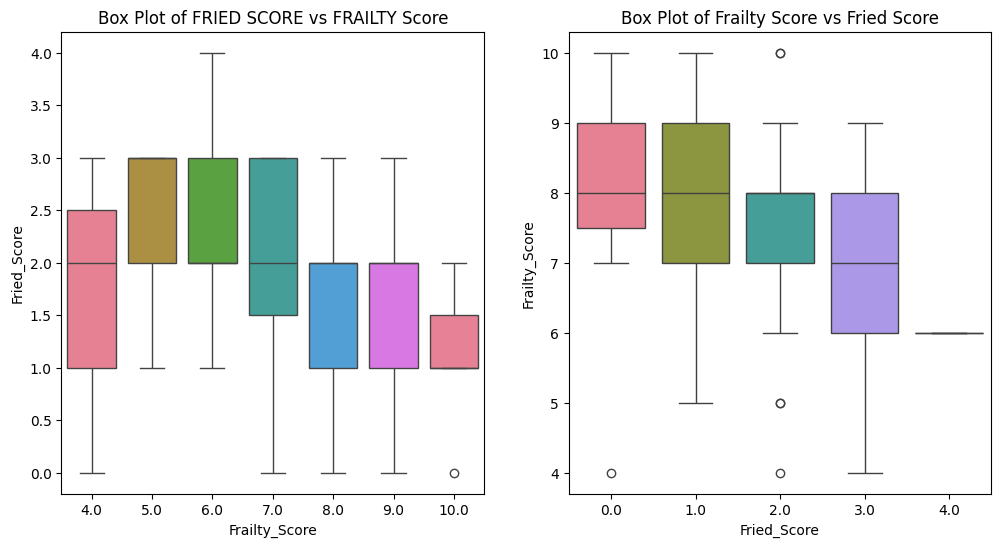

In [9]:
# Box plots for comparing the distribution of the target variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# subplot 1: FRAILTY SCORE vs Fried Score
sns.boxplot(y='Fried_Score_FRIED_TOTAL_Version_1', x='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax1,
    palette='husl', hue='Frailty_Score_FRAGIRE18_SQ001', legend=False)
ax1.set_title('Box Plot of FRIED SCORE vs FRAILTY Score')
ax1.set_xlabel('Frailty_Score')
ax1.set_ylabel('Fried_Score')

# subplot 2: Fried Score vs FRAILTY SCORE
sns.boxplot(x='Fried_Score_FRIED_TOTAL_Version_1', y='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax2,
    palette='husl', hue='Fried_Score_FRIED_TOTAL_Version_1', legend=False)
ax2.set_title('Box Plot of Frailty Score vs Fried Score')
ax2.set_xlabel('Fried_Score')
ax2.set_ylabel('Frailty_Score')

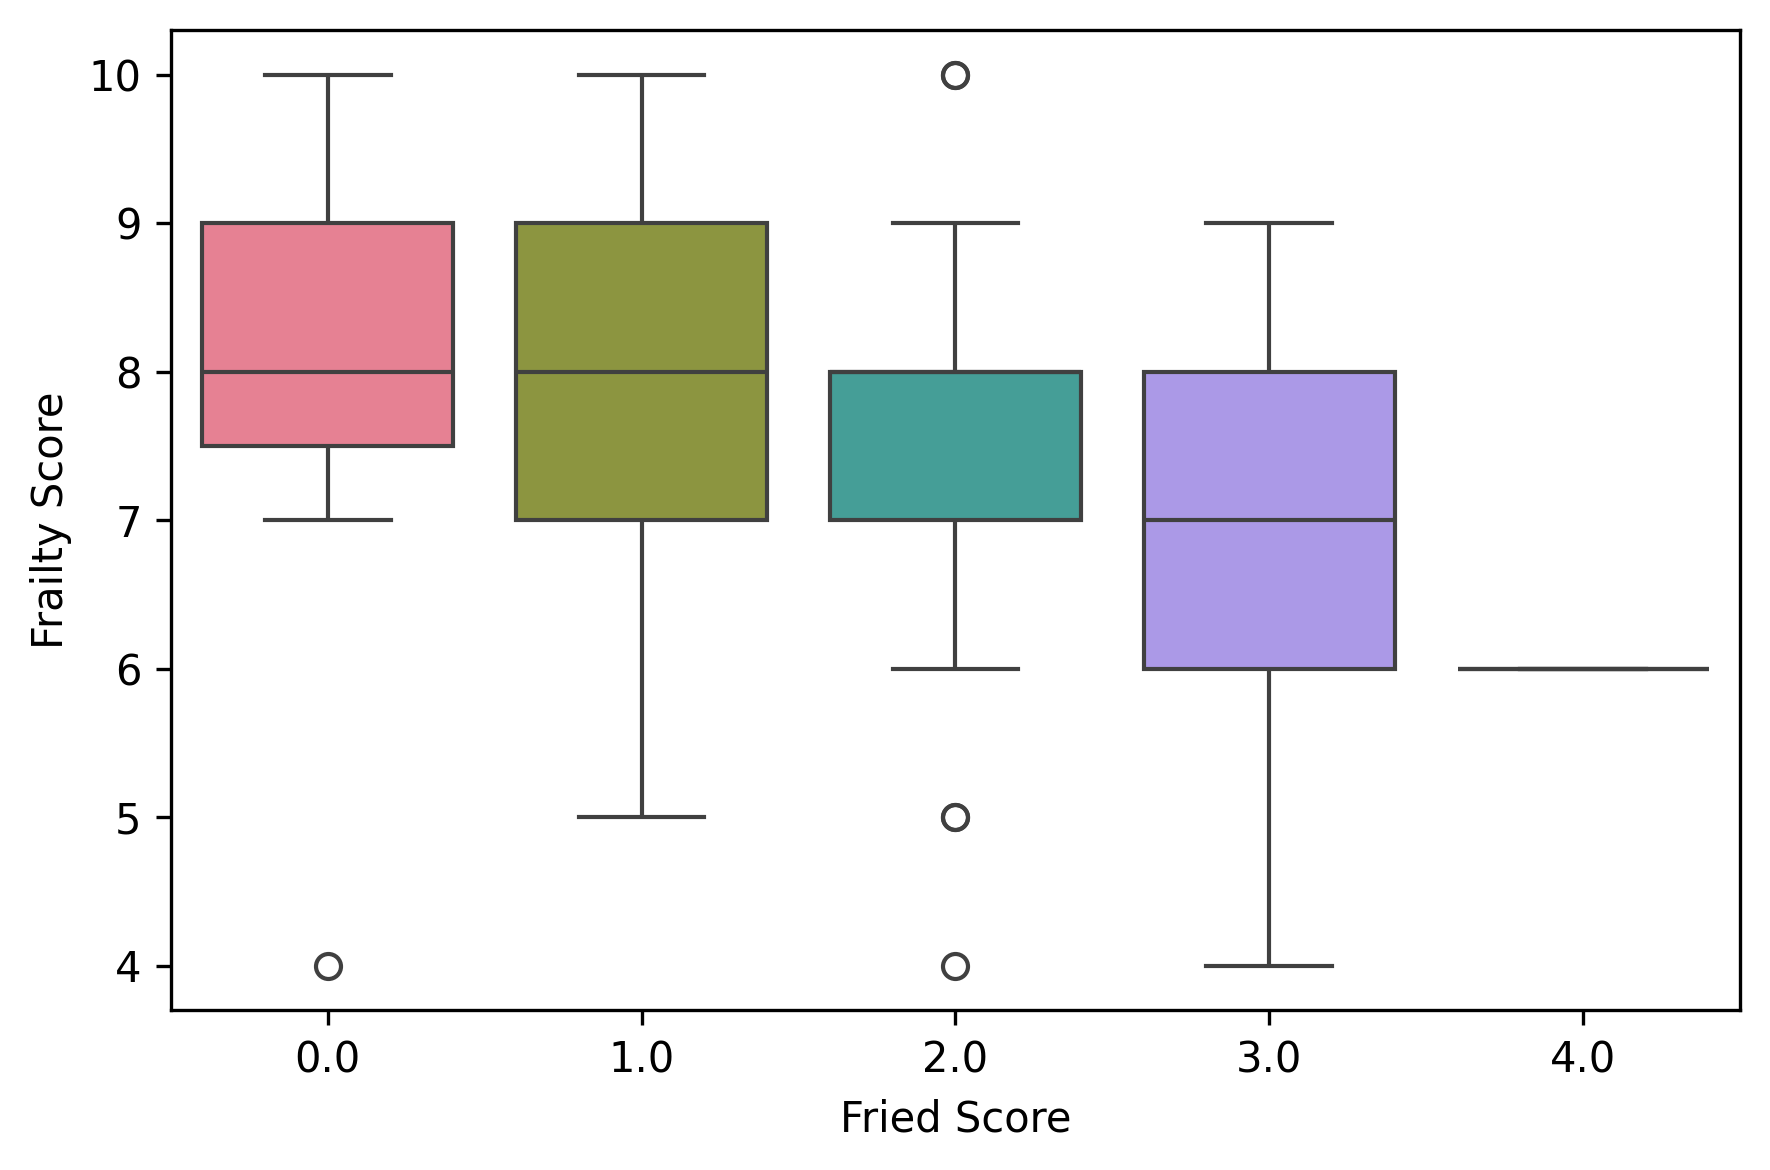

In [5]:
# Box plot for comparing Fried Score vs Expert's Score
plt.figure(figsize=(6, 4), dpi=300)  # Adjusted size for 2-column layout, high resolution
sns.boxplot(x='Fried_Score_FRIED_TOTAL_Version_1', 
            y='Frailty_Score_FRAGIRE18_SQ001', 
            data=data,
            palette='husl', 
            hue='Fried_Score_FRIED_TOTAL_Version_1', 
            legend=False)
plt.xlabel('Fried Score')
plt.ylabel("Frailty Score")
plt.tight_layout()  # Ensures proper spacing

### Fied_Score vs Fragire18_State and Fragire_Score vs Fried_State

Text(0, 0.5, 'Frailty Score')

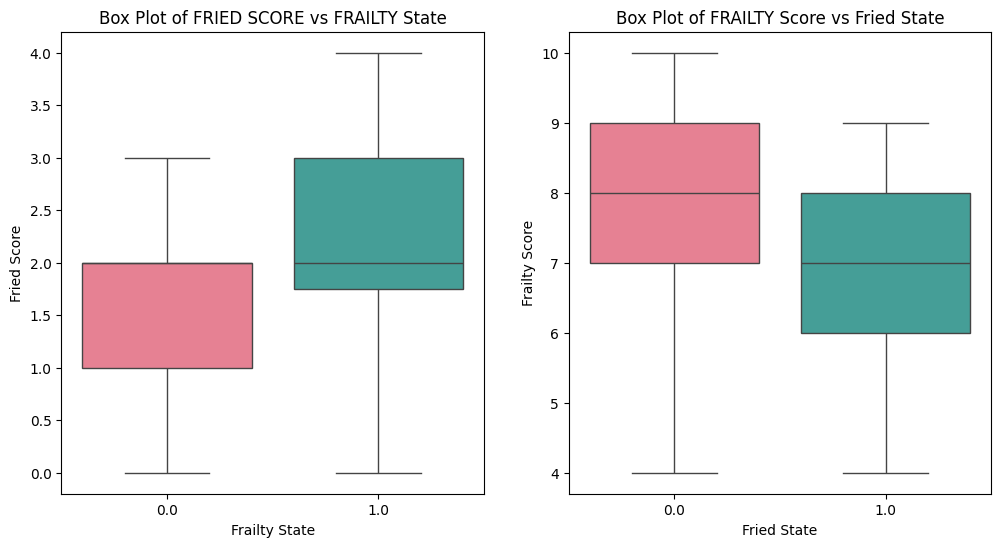

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# subplot 1: FRAILTY SCORE vs Fried Score
sns.boxplot(y='Fried_Score_FRIED_TOTAL_Version_1', x='Frailty_State_GFST', data=data, ax=ax1,
    palette='husl', hue='Frailty_State_GFST', legend=False)
ax1.set_title('Box Plot of FRIED SCORE vs FRAILTY State')
ax1.set_xlabel('Frailty State')
ax1.set_ylabel('Fried Score')

# subplot 2: FRAILTY SCORE vs Fried STATE
sns.boxplot(x='Fried_State', y='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax2,
    palette='husl', hue='Fried_State', legend=False)
ax2.set_title('Box Plot of FRAILTY Score vs Fried State')
ax2.set_xlabel('Fried State')
ax2.set_ylabel('Frailty Score')

### Fried Score vs Chute 6 mois / 12 mois

C:\Users\matth\AppData\Local\Temp\ipykernel_11764\3587287767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)
C:\Users\matth\AppData\Local\Temp\ipykernel_11764\3587287767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_12mois['FROPCOM0001'] = data_clean_12mois['FROPCOM0001'].astype(int)


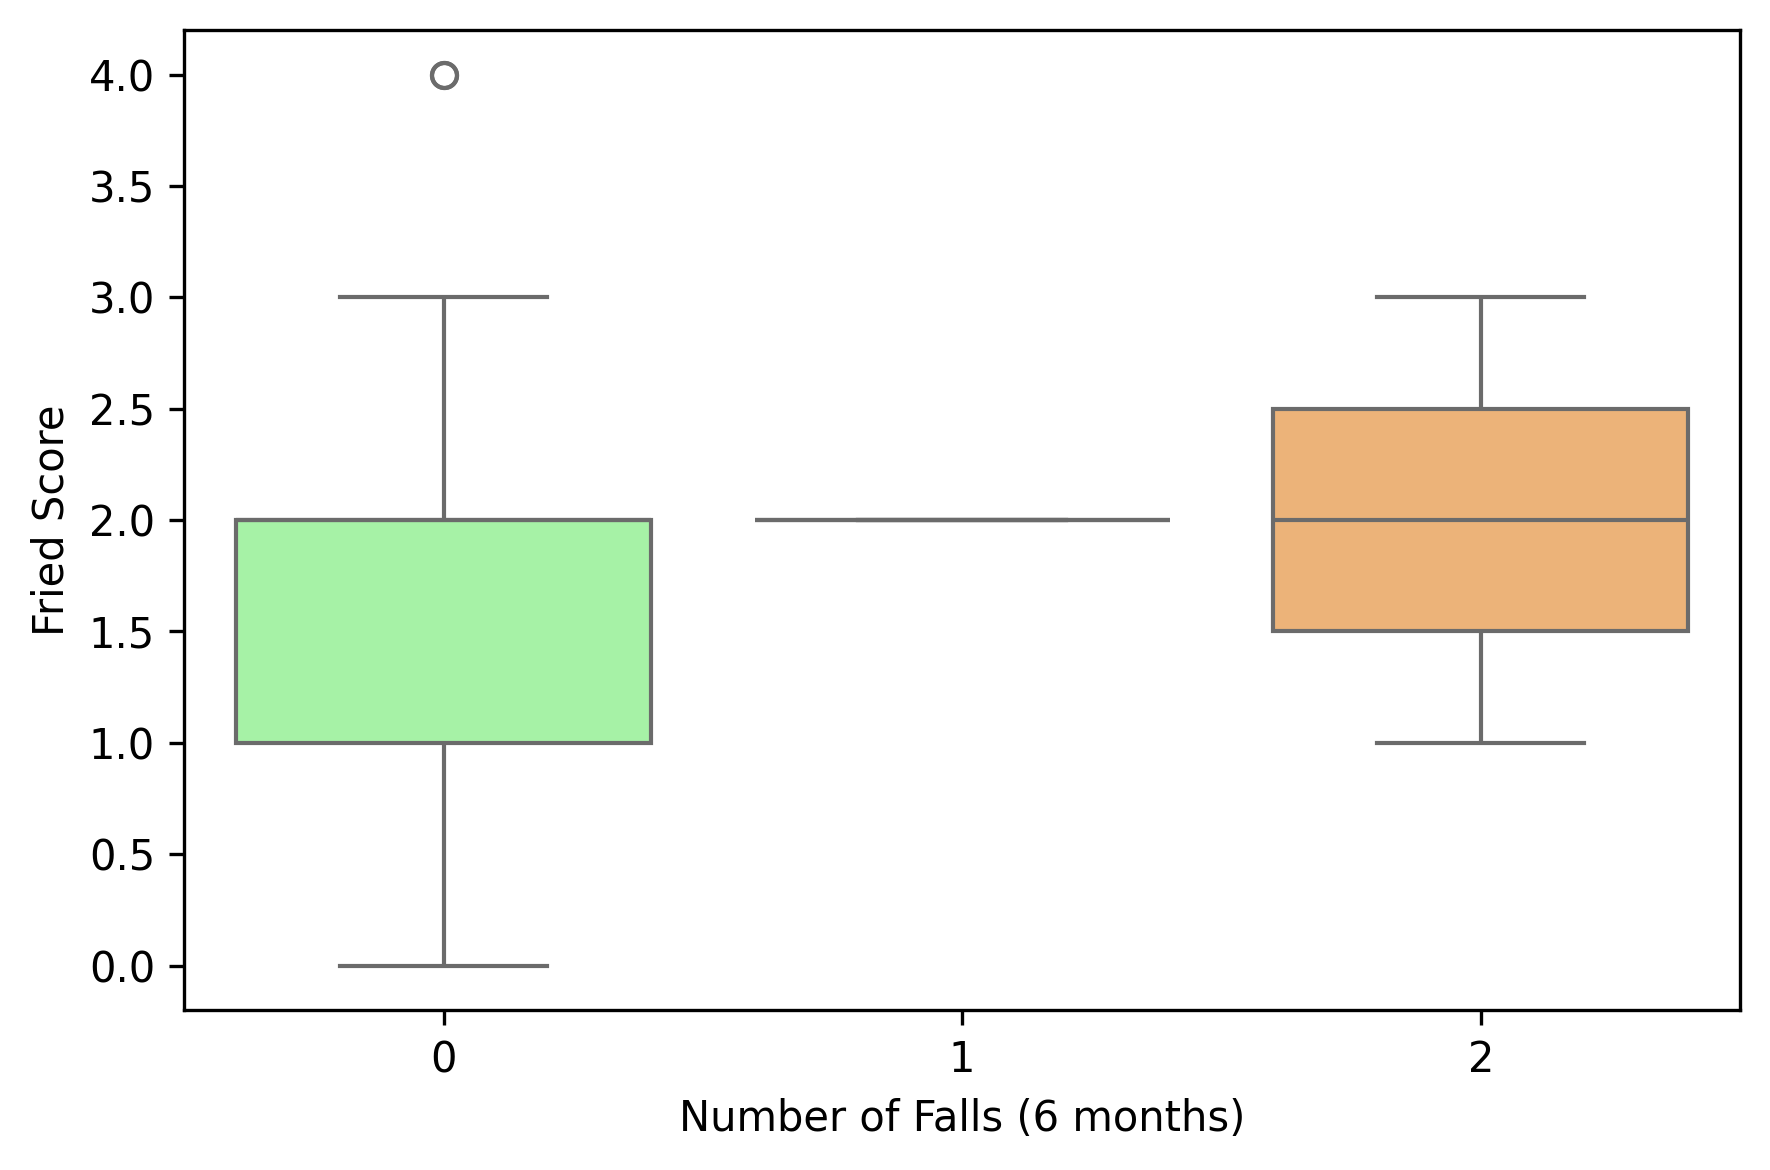

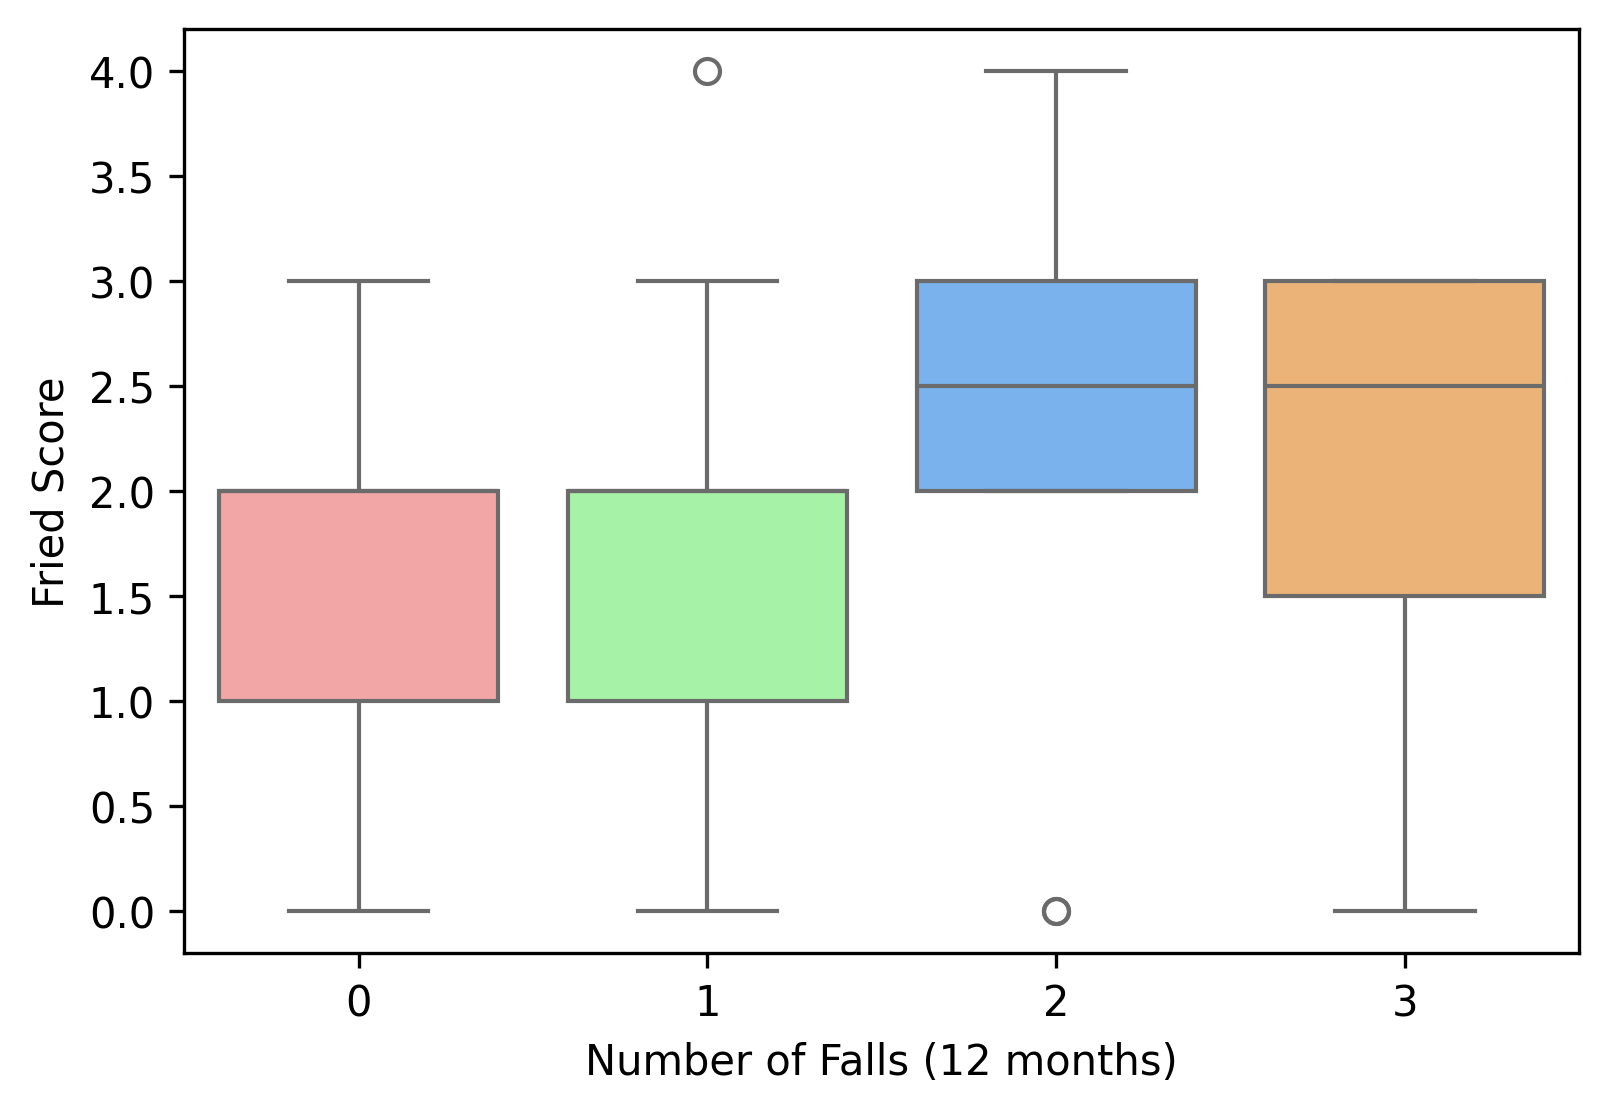

In [30]:
# version 2
# Remove missing values for falls analysis
data_clean_6mois = data.dropna(subset=['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'])
data_clean_12mois = data.dropna(subset=['FROPCOM0001'])

data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)
data_clean_12mois['FROPCOM0001'] = data_clean_12mois['FROPCOM0001'].astype(int)

# First plot: Fried Score vs Falls (6 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x="Nombre_de_chutes_suivi_mensuel_pendant_6_mois",
            y='Fried_Score_FRIED_TOTAL_Version_1',
            data=data_clean_6mois,
            palette=['#99FF99', '#66B2FF','#FFB366'], 
            hue='Nombre_de_chutes_suivi_mensuel_pendant_6_mois', 
            legend=False)
plt.xlabel('Number of Falls (6 months)')
plt.ylabel('Fried Score')
plt.tight_layout()
plt.show()

# Second plot: Fried Score vs Falls (12 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x='FROPCOM0001',
            y='Fried_Score_FRIED_TOTAL_Version_1',
            data=data_clean_12mois,
            palette=['#FF9999', '#99FF99', '#66B2FF', '#FFB366'],  # Custom colors for 0,1,2,3 falls
            hue='FROPCOM0001', 
            legend=False)
plt.xlabel('Number of Falls (12 months)')
plt.ylabel('Fried Score')
# plt.tight_layout()
plt.show()

### Frailty Score vs Chute

C:\Users\matth\AppData\Local\Temp\ipykernel_11764\1557314527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)


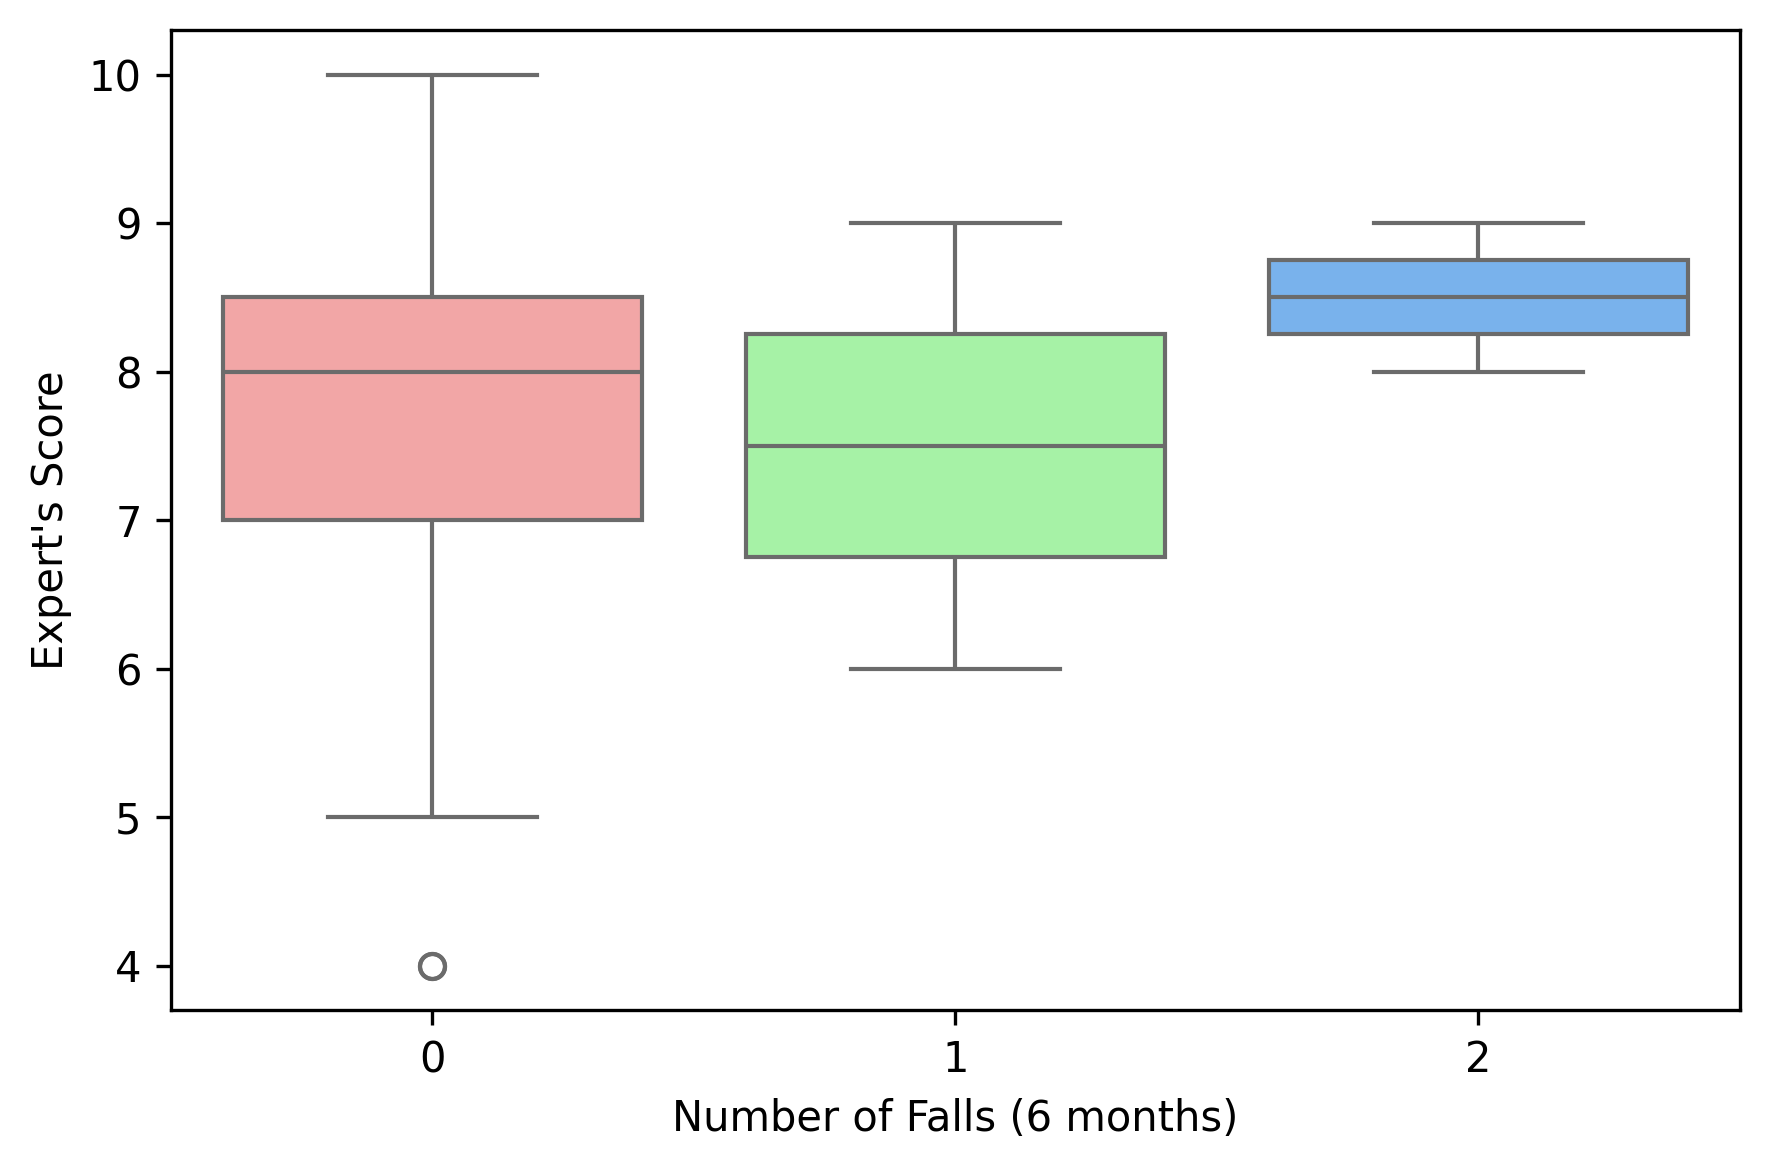

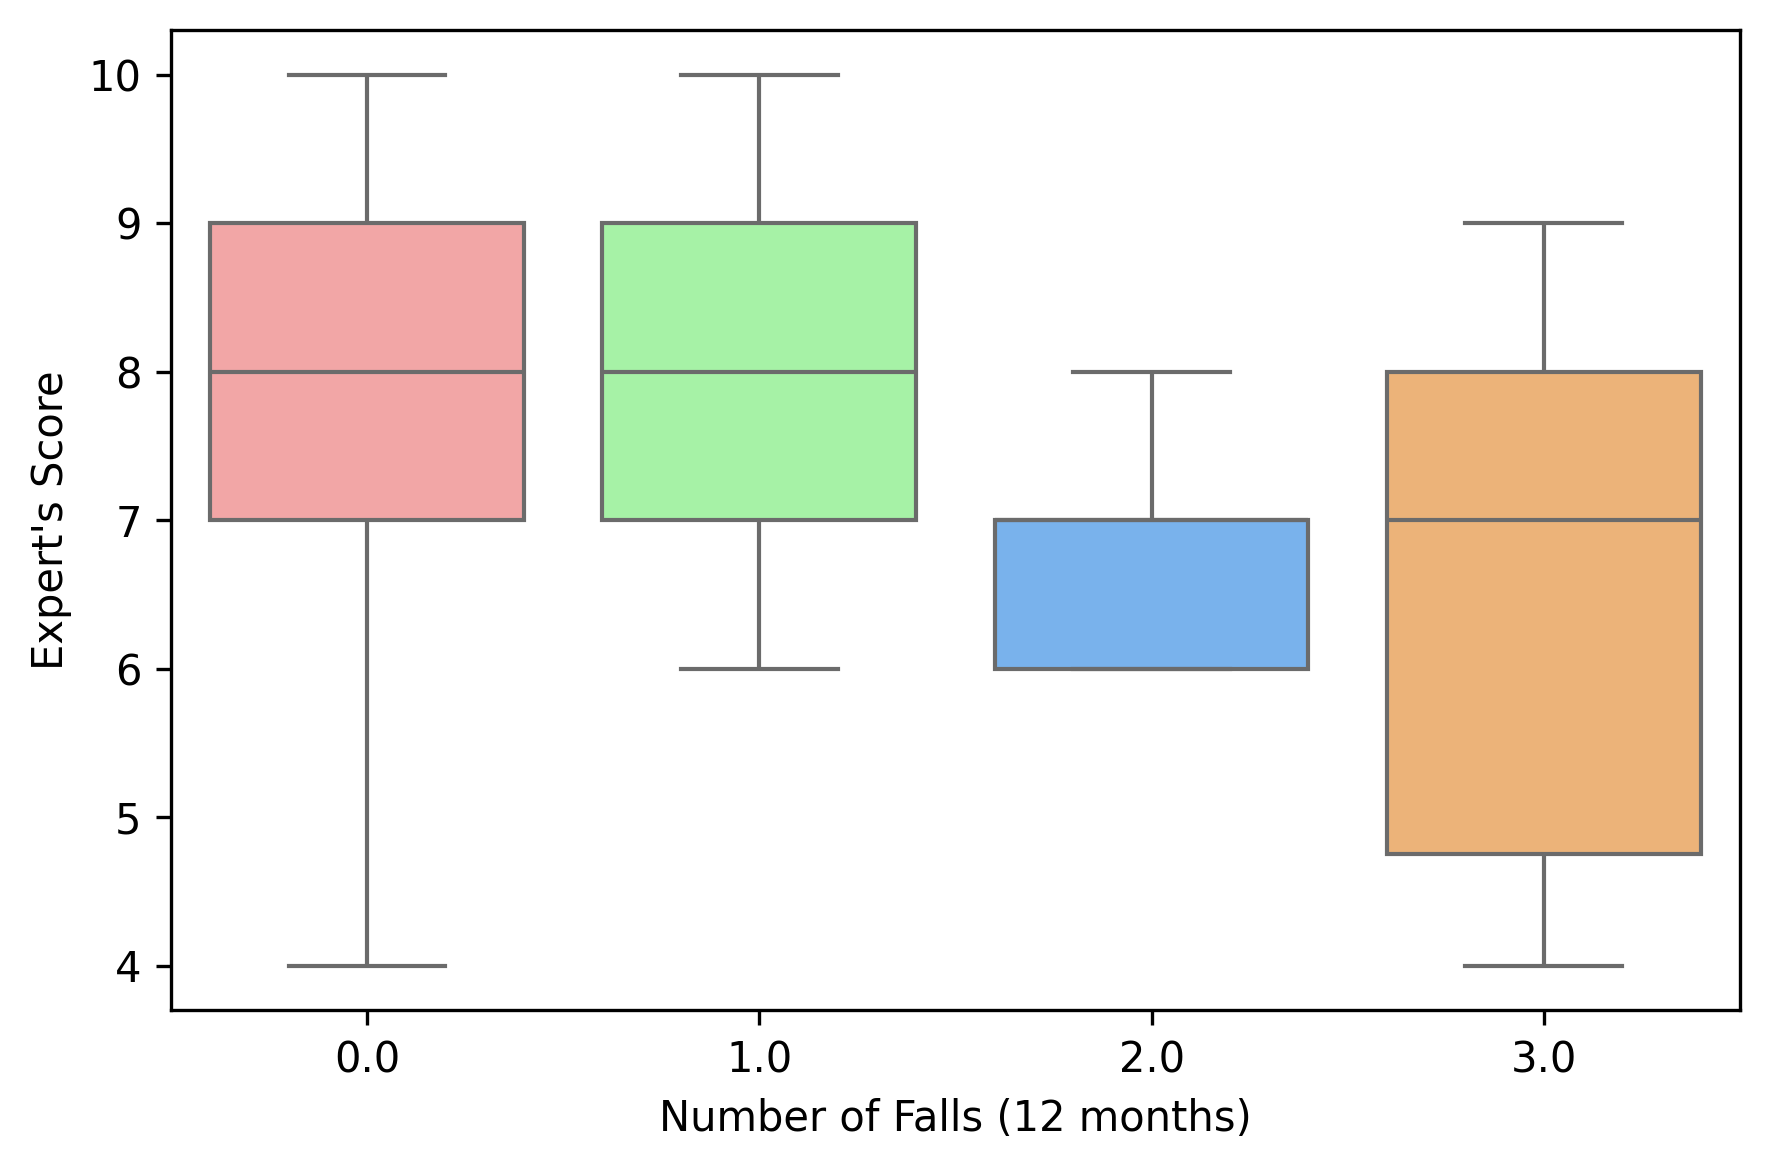

In [21]:
# Remove missing values
data_clean_6mois = data.dropna(subset=['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'])
data_clean_12mois = data.dropna(subset=['FROPCOM0001'])

data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)

# First plot: Expert's Score vs Falls (6 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x="Nombre_de_chutes_suivi_mensuel_pendant_6_mois",
            y='Frailty_Score_FRAGIRE18_SQ001',
            data=data_clean_6mois,
            palette=['#FF9999', '#99FF99', '#66B2FF'],
            hue="Nombre_de_chutes_suivi_mensuel_pendant_6_mois",
            legend=False)  # Custom colors for different falls
plt.xlabel('Number of Falls (6 months)')
plt.ylabel("Expert's Score")
plt.tight_layout()
plt.show()

# Second plot: Expert's Score vs Falls (12 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x='FROPCOM0001',
            y='Frailty_Score_FRAGIRE18_SQ001',
            data=data_clean_12mois,
            palette=['#FF9999', '#99FF99', '#66B2FF', '#FFB366'],
            hue='FROPCOM0001', legend=False)  # Custom colors for 0,1,2,3 falls
plt.xlabel('Number of Falls (12 months)')
plt.ylabel("Expert's Score")
plt.tight_layout()
plt.show()


### Auto-Evaluation vs Chute

C:\Users\matth\AppData\Local\Temp\ipykernel_19388\192038866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)
C:\Users\matth\AppData\Local\Temp\ipykernel_19388\192038866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_12mois['FROPCOM0001'] = data_clean_12mois['FROPCOM0001'].astype(int)


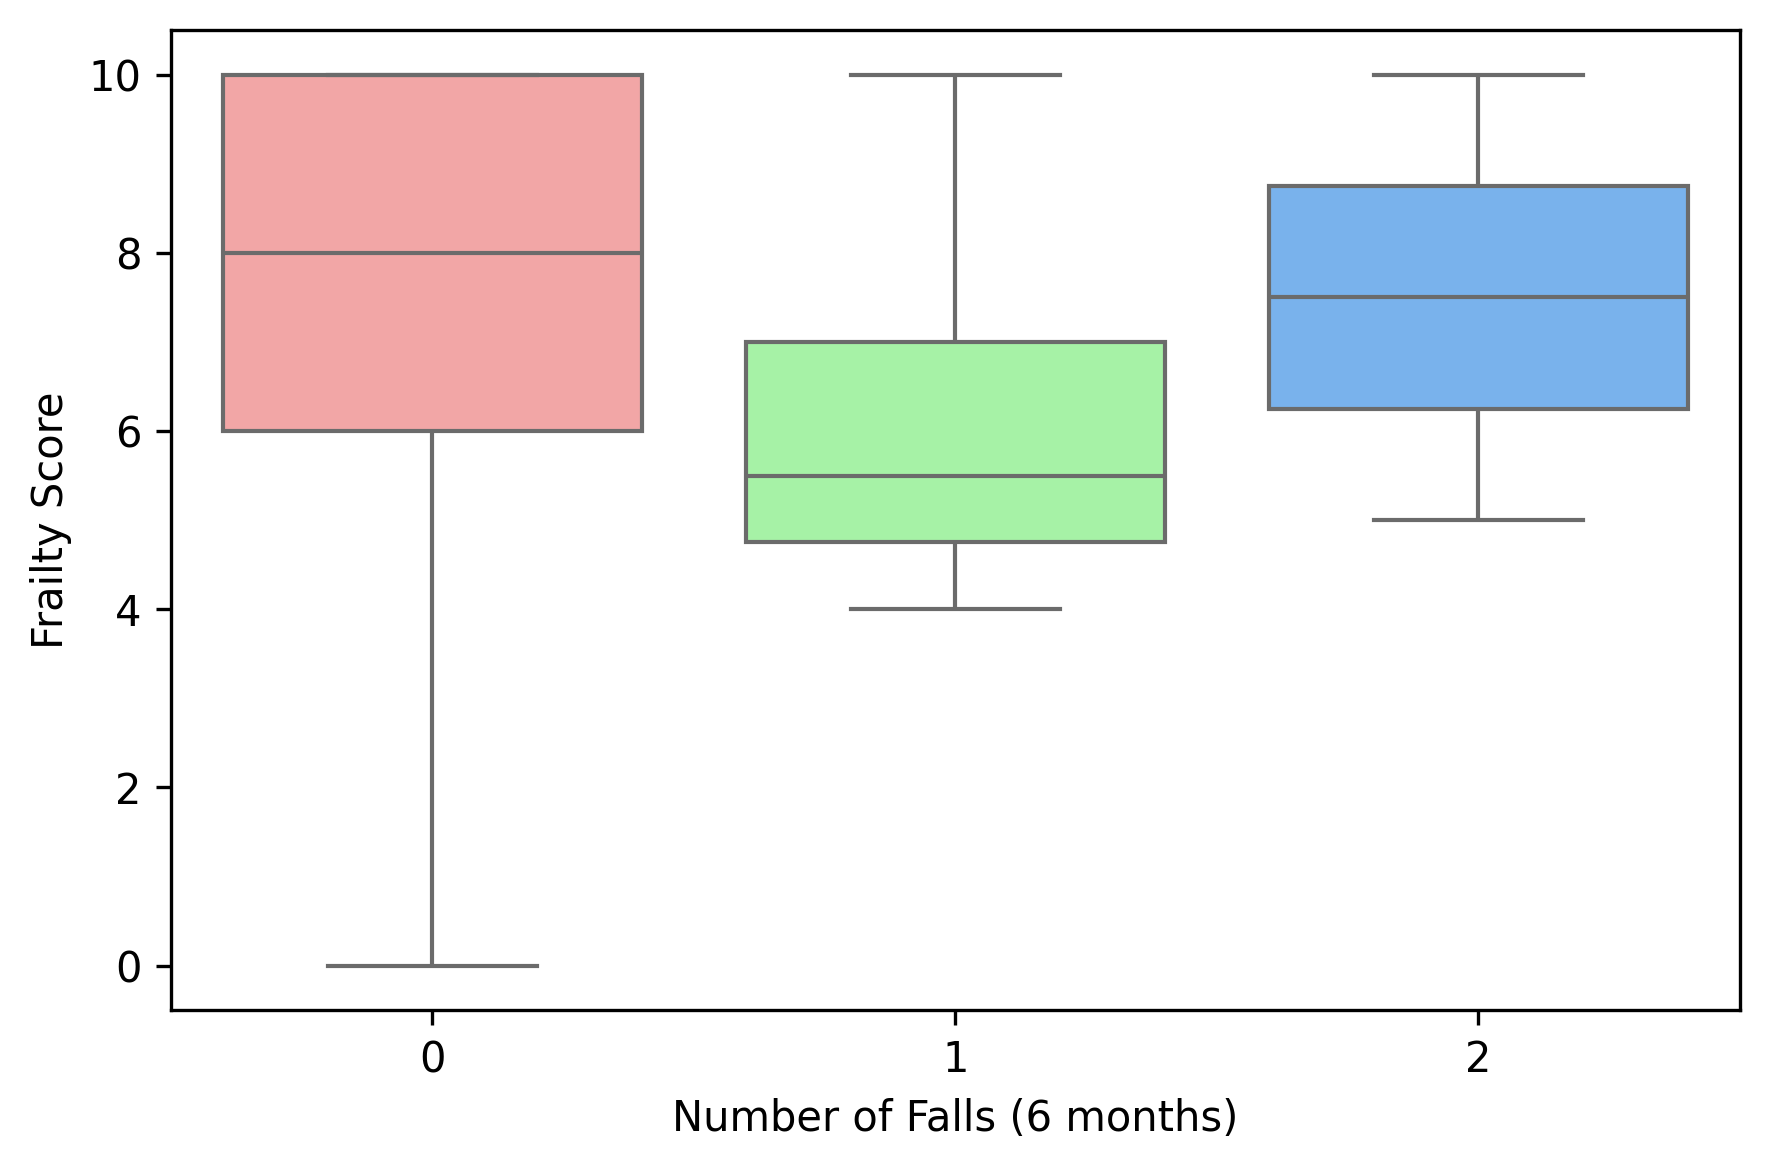

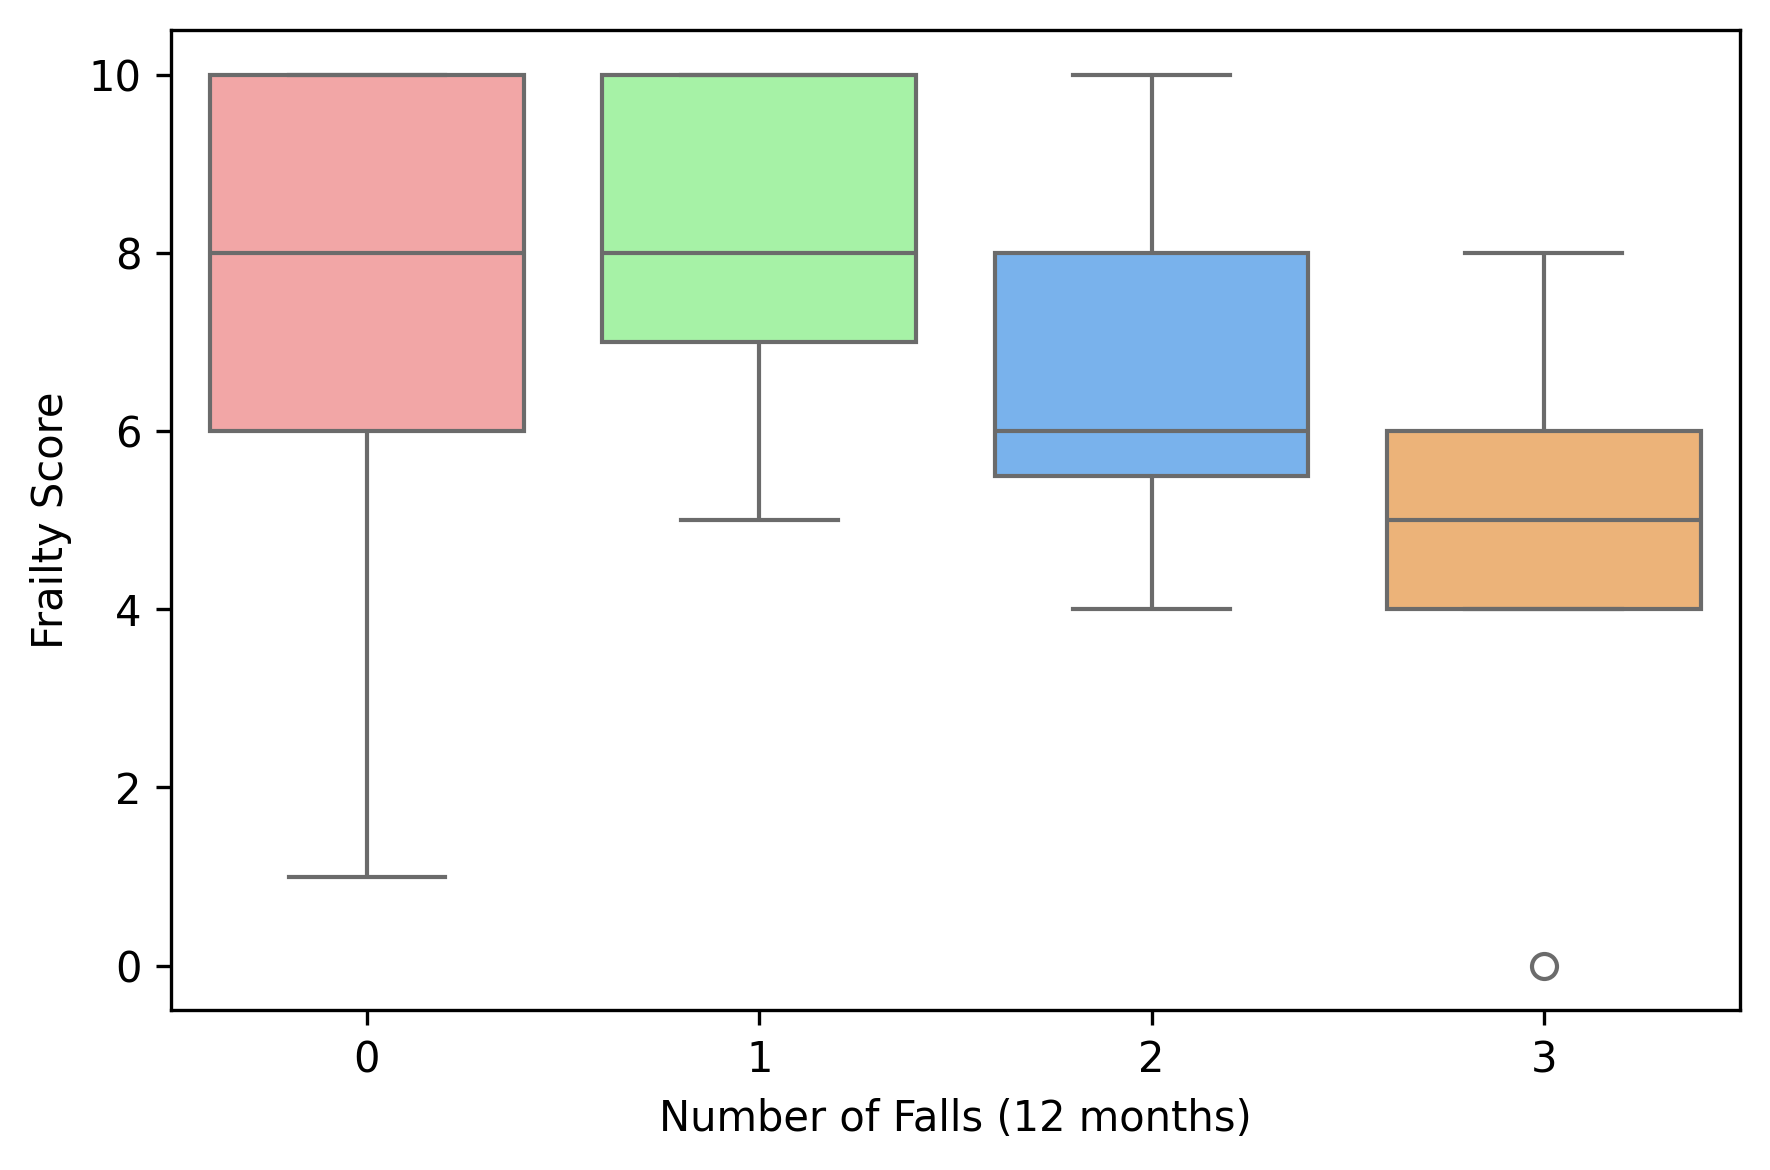

In [7]:
# Remove missing values and convert to int type
data_clean_6mois = data.dropna(subset=['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'])
data_clean_12mois = data.dropna(subset=['FROPCOM0001'])

# Convert to int type
data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'] = data_clean_6mois['Nombre_de_chutes_suivi_mensuel_pendant_6_mois'].astype(int)
data_clean_12mois['FROPCOM0001'] = data_clean_12mois['FROPCOM0001'].astype(int)

# First plot: Frailty Score vs Falls (6 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x="Nombre_de_chutes_suivi_mensuel_pendant_6_mois",
            y='FRAGIRE01_SQ001_',
            data=data_clean_6mois,
            palette=['#FF9999', '#99FF99', '#66B2FF'],
            hue="Nombre_de_chutes_suivi_mensuel_pendant_6_mois",
            legend=False)
plt.xlabel('Number of Falls (6 months)')
plt.ylabel('Frailty Score')
plt.tight_layout()
plt.show()

# Second plot: Frailty Score vs Falls (12 months)
plt.figure(figsize=(6, 4), dpi=300)
sns.boxplot(x='FROPCOM0001',
            y='FRAGIRE01_SQ001_',
            data=data_clean_12mois,
            palette=['#FF9999', '#99FF99', '#66B2FF', '#FFB366'],
            hue='FROPCOM0001',
            legend=False)
plt.xlabel('Number of Falls (12 months)')
plt.ylabel('Frailty Score')
plt.tight_layout()
plt.show()


### Auto-Evaluation vs Fried

### Auto-Evaluation vs Frailty

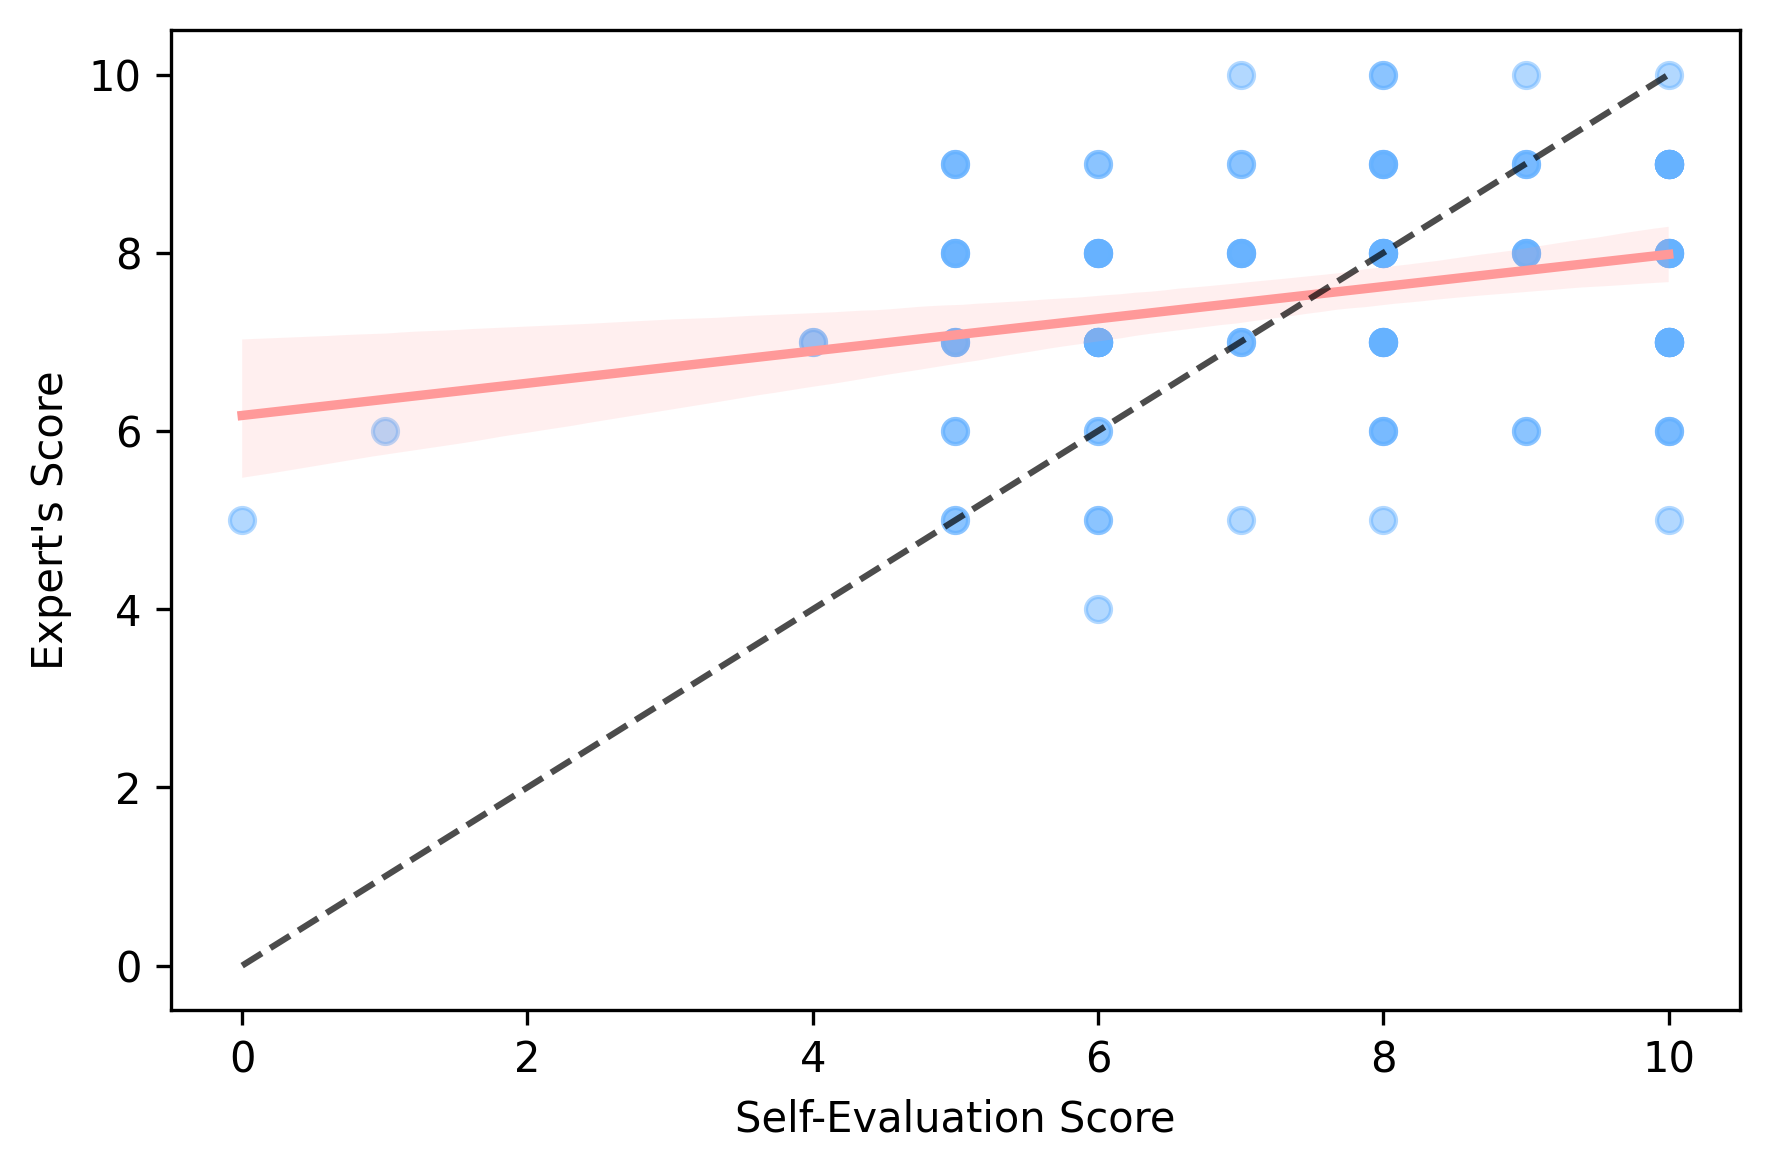

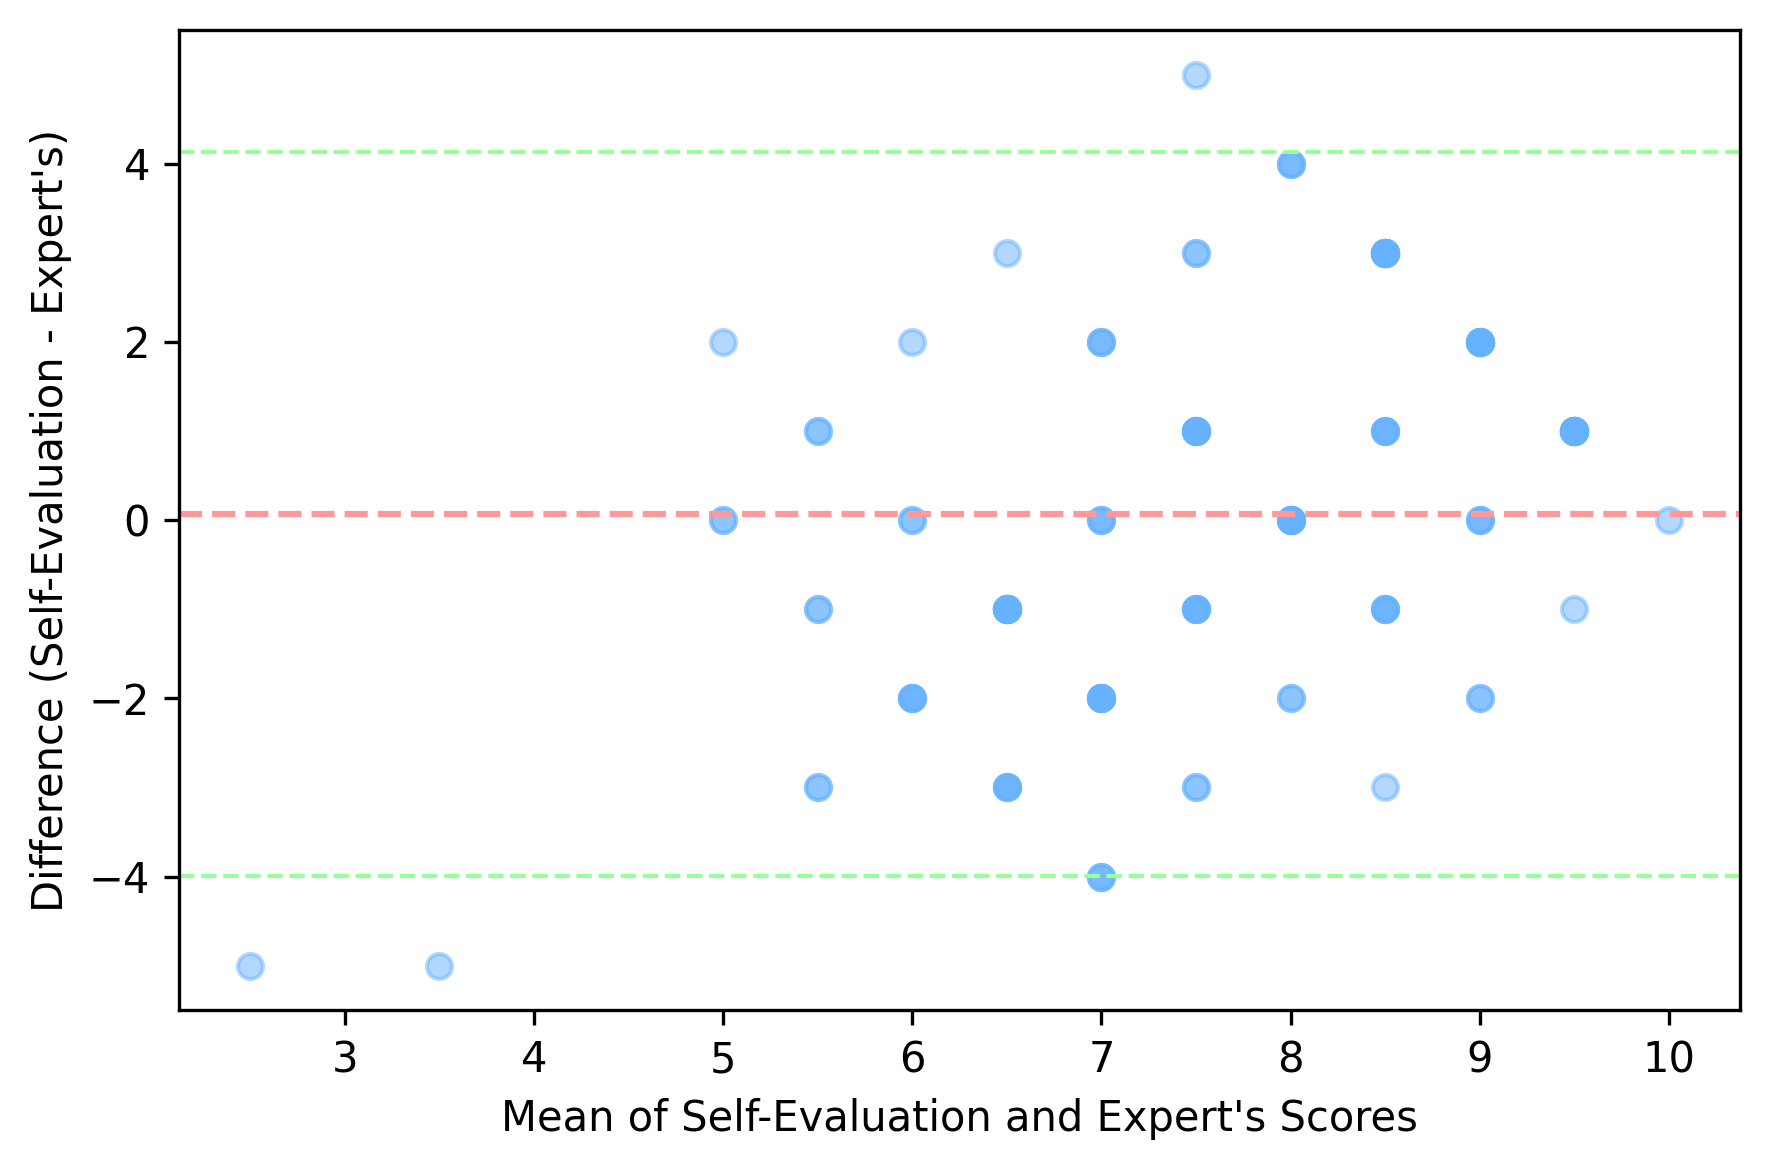

In [11]:
# Prepare the data
data_clean = data.dropna(subset=['FRAGIRE01_SQ001_', 'Frailty_Score_FRAGIRE18_SQ001'])

# Scatter Plot with Regression Line
plt.figure(figsize=(6, 4), dpi=300)
sns.regplot(x='FRAGIRE01_SQ001_', 
            y='Frailty_Score_FRAGIRE18_SQ001', 
            data=data_clean,
            scatter_kws={'alpha': 0.5, 'color': '#66B2FF'}, 
            line_kws={'color': '#FF9999'})
plt.plot([0, 10], [0, 10], linestyle="--", color="black", alpha=0.7)
plt.xlabel("Self-Evaluation Score")
plt.ylabel("Expert's Score")
plt.tight_layout()
plt.show()

# Bland-Altman Plot
mean_values = (data_clean['FRAGIRE01_SQ001_'] + data_clean['Frailty_Score_FRAGIRE18_SQ001']) / 2
differences = data_clean['FRAGIRE01_SQ001_'] - data_clean['Frailty_Score_FRAGIRE18_SQ001']
mean_diff = np.mean(differences)
std_diff = np.std(differences)

plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(mean_values, differences, alpha=0.5, color='#66B2FF')
plt.axhline(mean_diff, color='#FF9999', linestyle='--', linewidth=1.5)
plt.axhline(mean_diff + 1.96 * std_diff, color='#99FF99', linestyle='--', linewidth=1)
plt.axhline(mean_diff - 1.96 * std_diff, color='#99FF99', linestyle='--', linewidth=1)
plt.xlabel("Mean of Self-Evaluation and Expert's Scores")
plt.ylabel("Difference (Self-Evaluation - Expert's)")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Clean the data by removing rows with missing values
data_clean = data.dropna(subset=['FRAGIRE01_SQ001_', 'Frailty_Score_FRAGIRE18_SQ001'])

# Function to bin scores into categories (0-3: low, 4-6: medium, 7-10: high)
def categorize_score(score):
    if score <= 5:
        return 0
    elif score <= 7:
        return 1
    else:
        return 2

# Convert scores to categories
self_eval_cat = data_clean['FRAGIRE01_SQ001_'].apply(categorize_score)
expert_eval_cat = data_clean['Frailty_Score_FRAGIRE18_SQ001'].apply(categorize_score)

# Compute Cohen's Kappa
kappa_score = cohen_kappa_score(self_eval_cat, expert_eval_cat)

print(f"Cohen's Kappa Score: {kappa_score:.3f}")

# Interpretation guide
if kappa_score < 0:
    interpretation = "Poor agreement"
elif kappa_score < 0.20:
    interpretation = "Slight agreement"
elif kappa_score < 0.40:
    interpretation = "Fair agreement"
elif kappa_score < 0.60:
    interpretation = "Moderate agreement"
elif kappa_score < 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print(f"Interpretation: {interpretation}")

Cohen's Kappa Score: 0.108
Interpretation: Slight agreement


### Statokinesigram - Frail


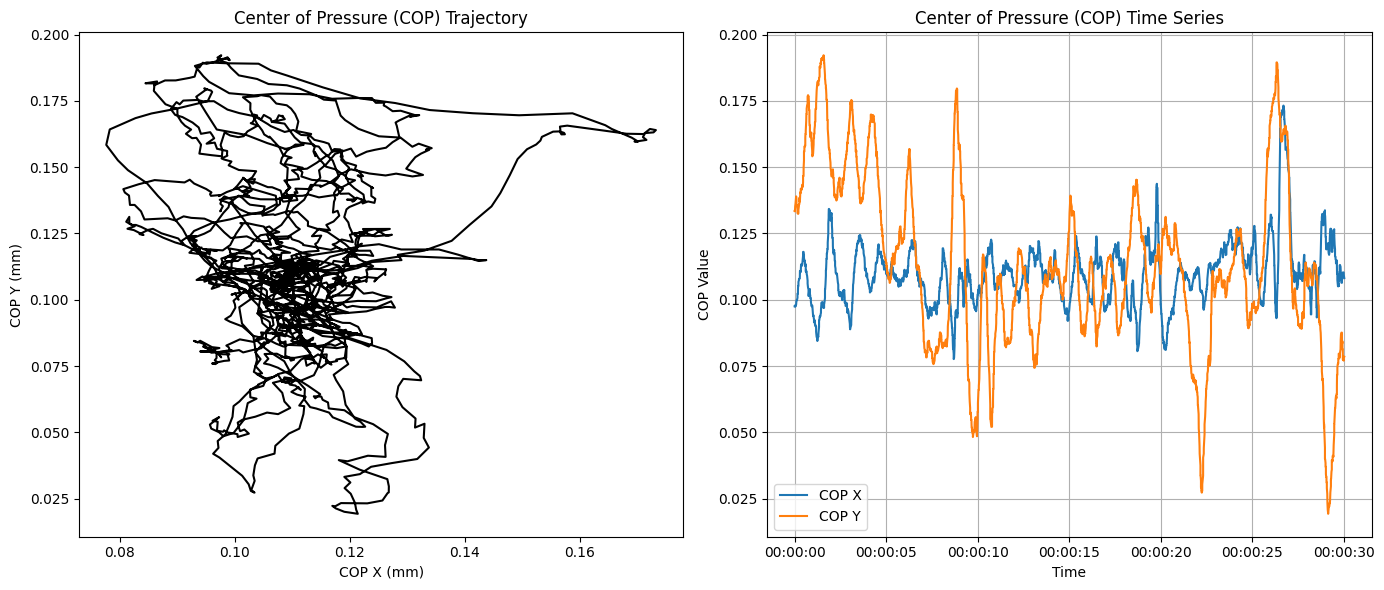

In [ ]:
def load_data(foldername):
    base_path_posture = "P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{}/t0/posture/"

    posture_data_files = {
        'yf_data': "2017-09-21_08_22_12_YF.txt",
        'yo_data': "2017-09-21_08_22_12_YO.txt"
    }

    data_forceplatform = {}
    for name, filename in posture_data_files.items():
        path = base_path_posture.format(foldername) + filename

        try :
            data_forceplatform[name] = pd.read_csv(path, sep="\t")
        except Exception as e:
            print("Error while loading data from", path)
            print("Exception :", e)

            return None

    return data_forceplatform

# Usage - load data
data_forceplatform = load_data('LEG033MML')

yf_data = data_forceplatform['yf_data']
yo_data = data_forceplatform['yo_data']

yf_data['TIMESTAMP'] = pd.to_datetime(yf_data['TIMESTAMP'], unit='s')
yo_data['TIMESTAMP'] = pd.to_datetime(yo_data['TIMESTAMP'], unit='s')

# =========================================================================

# Assuming force plate dimensions
length = 1  # replace with actual length
width = 1  # replace with actual width

# Calculate total force
yf_data['TotalForce'] = yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']

# Calculate COP_X and COP_Y
yf_data['COP_X'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG']) * width / 2 -
                (yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * width / 2) /yf_data['TotalForce']

yf_data['COP_Y'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG']) * length / 2 -
                (yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * length / 2) / yf_data['TotalForce']


# Create the combined plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: COP trajectory
axs[0].plot(yf_data['COP_X'], yf_data['COP_Y'], color='k')
axs[0].set_title('Center of Pressure (COP) Trajectory')
axs[0].set_xlabel('COP X (mm)')
axs[0].set_ylabel('COP Y (mm)')
axs[0].grid(False)

# Right: Time series of COP_X and COP_Y
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_X'], label='COP X')
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_Y'], label='COP Y')
axs[1].set_title('Center of Pressure (COP) Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('COP Value')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

#========================================================================

### Statokinesigram - Healthy

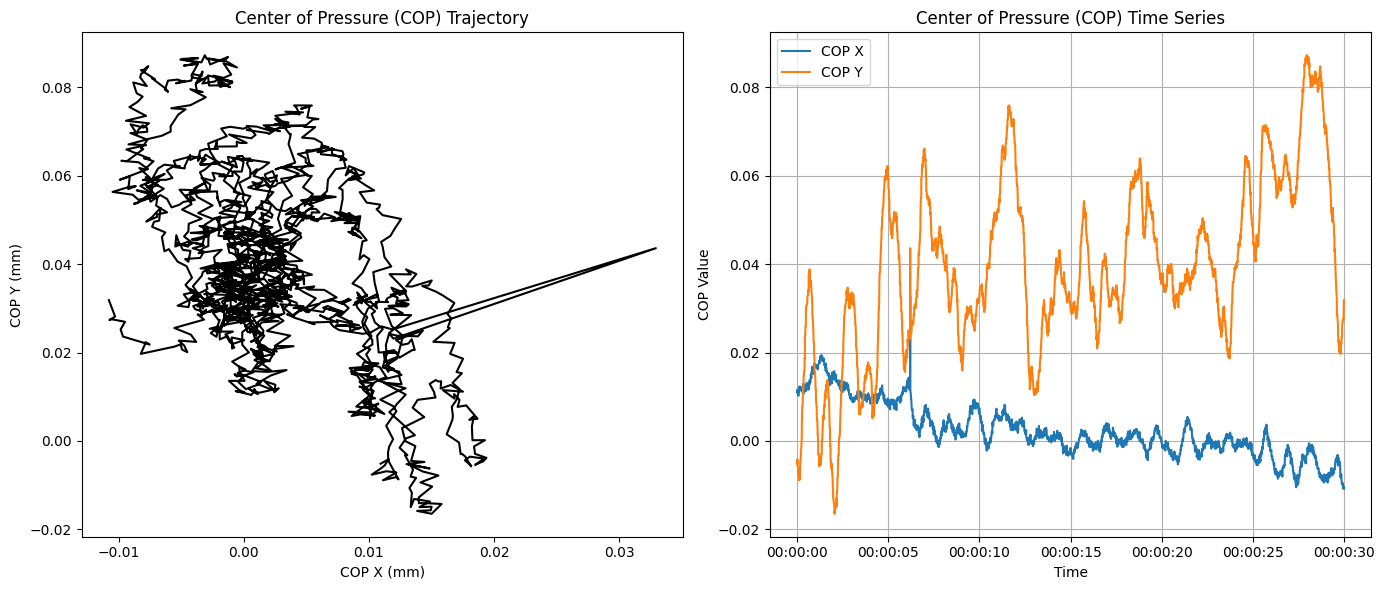

In [ ]:
def load_data(foldername):
    base_path_posture = "P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{}/t0/posture/"

    posture_data_files = {
        'yf_data': "2017-09-21_08_22_12_YF.txt",
        'yo_data': "2017-09-21_08_22_12_YO.txt"
    }

    data_forceplatform = {}
    for name, filename in posture_data_files.items():
        path = base_path_posture.format(foldername) + filename

        try :
            data_forceplatform[name] = pd.read_csv(path, sep="\t")
        except Exception as e:
            print("Error while loading data from", path)
            print("Exception :", e)

            return None

    return data_forceplatform

# Usage - load data
data_forceplatform = load_data('LEG028DJO')

yf_data = data_forceplatform['yf_data']
yo_data = data_forceplatform['yo_data']

yf_data['TIMESTAMP'] = pd.to_datetime(yf_data['TIMESTAMP'], unit='s')
yo_data['TIMESTAMP'] = pd.to_datetime(yo_data['TIMESTAMP'], unit='s')

# =========================================================================

# Assuming force plate dimensions
length = 1  # replace with actual length
width = 1  # replace with actual width

# Calculate total force
yf_data['TotalForce'] = yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']

# Calculate COP_X and COP_Y
yf_data['COP_X'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG']) * width / 2 -
                (yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * width / 2) /yf_data['TotalForce']

yf_data['COP_Y'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG']) * length / 2 -
                (yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * length / 2) / yf_data['TotalForce']


# Create the combined plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: COP trajectory
axs[0].plot(yf_data['COP_X'], yf_data['COP_Y'], color='k')
axs[0].set_title('Center of Pressure (COP) Trajectory')
axs[0].set_xlabel('COP X (mm)')
axs[0].set_ylabel('COP Y (mm)')
axs[0].grid(False)

# Right: Time series of COP_X and COP_Y
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_X'], label='COP X')
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_Y'], label='COP Y')
axs[1].set_title('Center of Pressure (COP) Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('COP Value')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


### GAIT - HEALTHY

In [ ]:

def load_gait_data(foldername):
    """
    Load gait data from a specified folder.

    Parameters:
        foldername (str): The folder containing the gait data files (e.g., 'LEG028DJO').

    Returns:
        dict: A dictionary containing dataframes for each IMU ('ce_data', 'pd_data', 'pg_data', 'te_data').
              If a file is missing, the corresponding key will not be included.
    """
    base_path_gait = f"P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{foldername}/t0/gait/"

    gait_data_files = {
        'ce_data': "ACQ_CE.txt",
        'pd_data': "ACQ_PD.txt",
        'pg_data': "ACQ_PG.txt",
        'te_data': "ACQ_TE.txt"
    }

    data_gait = {}

    try:
        for name, filename in gait_data_files.items():
            path = os.path.join(base_path_gait, filename)

            if os.path.exists(path):
                # Load the data into a DataFrame
                data_gait[name] = pd.read_csv(path, sep="\t", skiprows=4)
                print(f"Loaded {filename} successfully.")
            else:
                print(f"File not found: {filename}")

        if not data_gait:
            print("No gait data files could be loaded.")
        return data_gait

    except Exception as e:
        print("An error occurred while loading gait data.")
        print(f"Error: {e}")
        return None

# Example usage
foldername = 'LEG028DJO'
data_gait = load_gait_data(foldername)

if data_gait:
    for key, df in data_gait.items():
        print(f"{key}: {df.shape} rows and columns loaded.")


Loaded ACQ_CE.txt successfully.
Loaded ACQ_PD.txt successfully.
Loaded ACQ_PG.txt successfully.
Loaded ACQ_TE.txt successfully.
ce_data: (2581, 33) rows and columns loaded.
pd_data: (2581, 33) rows and columns loaded.
pg_data: (2581, 33) rows and columns loaded.
te_data: (2581, 33) rows and columns loaded.


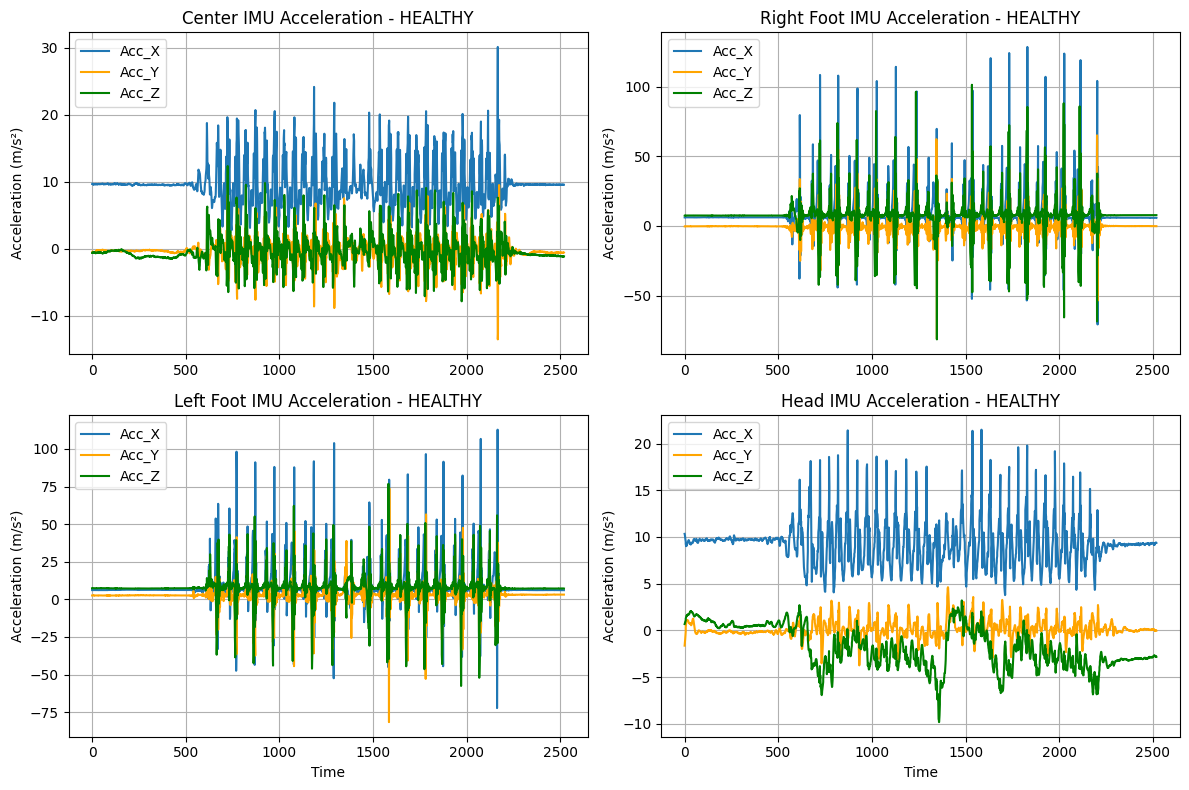

In [ ]:
def plot_gait_data(data_gait):
    """
    Plot acceleration data for all IMUs from the gait dataset.

    Parameters:
        data_gait (dict): Dictionary containing DataFrames for each IMU ('ce_data', 'pd_data', 'pg_data', 'te_data').
    """
    imu_names = {
        'ce_data': 'Center',
        'pd_data': 'Right Foot',
        'pg_data': 'Left Foot',
        'te_data': 'Head'
    }

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    for i, (name, df) in enumerate(data_gait.items()):
        # df.drop_duplicates('Time_Of_Arrival', keep='last')
        time = (df['Time_Of_Arrival'] - df['Time_Of_Arrival'].iloc[0])
        acc_x = df['Acc_X']
        acc_y = df['Acc_Y']
        acc_z = df['Acc_Z']

        # Plot acceleration
        axs[i].plot(time, acc_x, label='Acc_X')
        axs[i].plot(time, acc_y, label='Acc_Y', color='orange')
        axs[i].plot(time, acc_z, label='Acc_Z', color='green')
        axs[i].set_title(f'{imu_names[name]} IMU Acceleration - HEALTHY')
        axs[i].set_ylabel('Acceleration (m/s²)')
        axs[i].legend()
        axs[i].grid()

    axs[2].set_xlabel('Time')
    axs[3].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_gait_data(data_gait)



### GAIT - FRAIL

In [ ]:
# Example usage
foldername_F = 'LEG037MMN'
data_gait_F = load_gait_data(foldername_F)

if data_gait_F:
    for key_F, df_F in data_gait_F.items():
        print(f"{key_F}: {df_F.shape} rows and columns loaded.")

Loaded ACQ_CE.txt successfully.
Loaded ACQ_PD.txt successfully.
Loaded ACQ_PG.txt successfully.
Loaded ACQ_TE.txt successfully.
ce_data: (3364, 33) rows and columns loaded.
pd_data: (3364, 33) rows and columns loaded.
pg_data: (3364, 33) rows and columns loaded.
te_data: (3364, 33) rows and columns loaded.


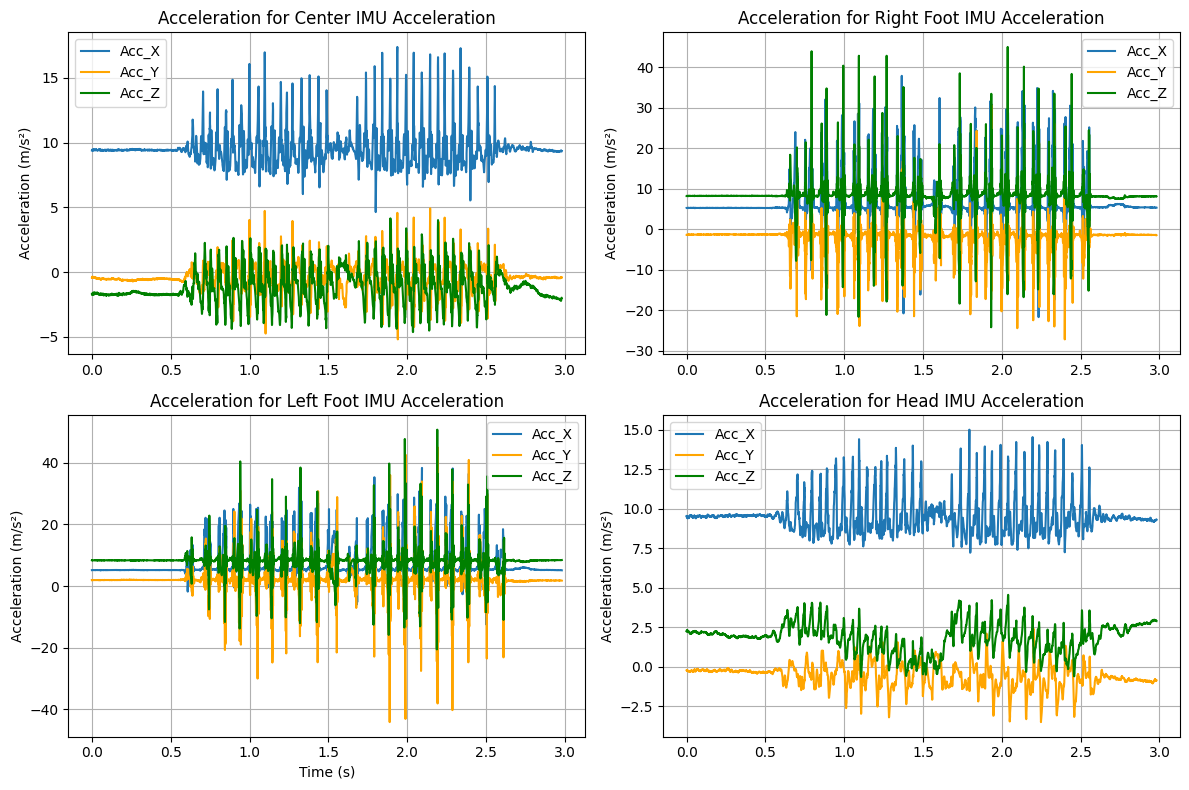

In [ ]:
# Plot the gait data- Frail
plot_gait_data(data_gait_F)



### Statistical Analysis

#### COMPARAISON DE MARCHE (GAIT)

##### APA(EXAMCLINO23)

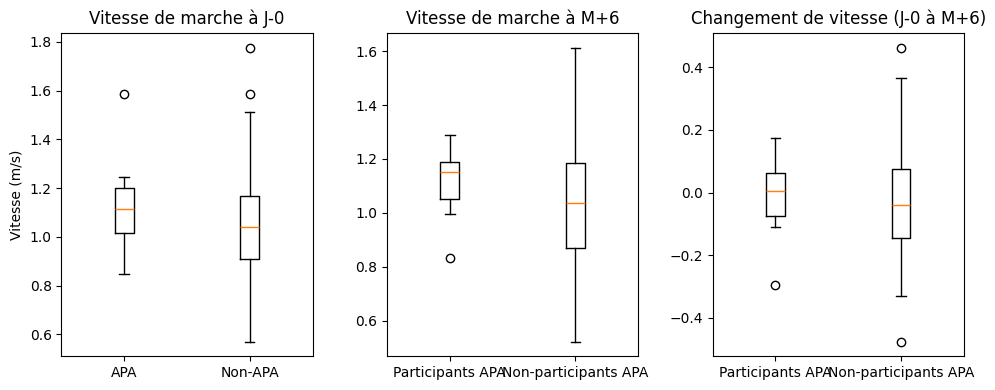

{'Between groups at J-0 (independent t-test)': 0.41151319521092355,
 'Between groups at M+6 (independent t-test)': 0.36057482143049335,
 'Between groups for Speed Change (independent t-test)': 0.892914308561342}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with complete baseline and follow-up data are included
data_examclin023 = data[['EXAMCLIN023', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin023 = data_examclin023.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate Speed Change (Follow-up - Baseline)
data_examclin023['Speed_Change'] = data_examclin023['AvgSpeed_follow-up'] - data_examclin023['AvgSpeed_baseline']

# Split data into APA participants and non-participants
apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 1]
non_apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_ttest_baseline = ttest_ind(apa_participants['AvgSpeed_baseline'], non_apa_participants['AvgSpeed_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_ttest_followup = ttest_ind(apa_participants['AvgSpeed_follow-up'], non_apa_participants['AvgSpeed_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change = ttest_ind(apa_participants['Speed_Change'], non_apa_participants['Speed_Change'])

# Data visualization: Boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [apa_participants['AvgSpeed_baseline'], non_apa_participants['AvgSpeed_baseline']],
    tick_labels=["APA", "Non-APA"]
)
plt.title("Vitesse de marche à J-0")
plt.ylabel("Vitesse (m/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [apa_participants['AvgSpeed_follow-up'], non_apa_participants['AvgSpeed_follow-up']],
    tick_labels=["Participants APA", "Non-participants APA"]
)
plt.title("Vitesse de marche à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [apa_participants['Speed_Change'], non_apa_participants['Speed_Change']],
    tick_labels=["Participants APA", "Non-participants APA"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_between_groups = {
    "Between groups at J-0 (independent t-test)": between_group_ttest_baseline.pvalue,
    "Between groups at M+6 (independent t-test)": between_group_ttest_followup.pvalue,
    "Between groups for Speed Change (independent t-test)": between_group_speed_change.pvalue,
}

results_between_groups


##### EXAMCLIN02

<ipython-input-21-31d279c0ae5d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
<ipython-input-21-31d279c0ae5d>:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
<ipython-input-21-31d279c0ae5d>:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


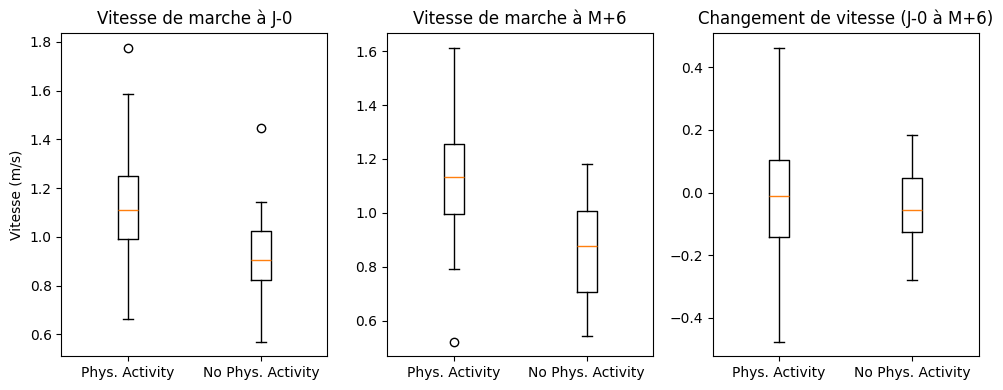

{'Between groups at J-0 (independent t-test)': 9.592719044109182e-06,
 'Between groups at M+6 (independent t-test)': 2.2607611455616107e-07,
 'Between groups for Speed Change (independent t-test)': 0.39823633716705986}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_examclin02 = data[['EXAMCLIN02', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin02 = data_examclin02.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate speed change (follow-up - baseline)
data_examclin02['Speed_Change'] = data_examclin02['AvgSpeed_follow-up'] - data_examclin02['AvgSpeed_baseline']

# Split data into participants with and without physical activity
physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 1]
non_physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_physac_ttest_baseline = ttest_ind(physac_participants['AvgSpeed_baseline'], non_physac_participants['AvgSpeed_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_physac_ttest_followup = ttest_ind(physac_participants['AvgSpeed_follow-up'], non_physac_participants['AvgSpeed_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_physac = ttest_ind(physac_participants['Speed_Change'], non_physac_participants['Speed_Change'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [physac_participants['AvgSpeed_baseline'], non_physac_participants['AvgSpeed_baseline']],
    labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse de marche à J-0")
plt.ylabel("Vitesse (m/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [physac_participants['AvgSpeed_follow-up'], non_physac_participants['AvgSpeed_follow-up']],
    labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse de marche à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [physac_participants['Speed_Change'], non_physac_participants['Speed_Change']],
    labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 (independent t-test)": between_group_physac_ttest_baseline.pvalue,
    "Between groups at M+6 (independent t-test)": between_group_physac_ttest_followup.pvalue,
    "Between groups for Speed Change (independent t-test)": between_group_speed_change_physac.pvalue,
}

results_physac


##### EXAMCLIN022

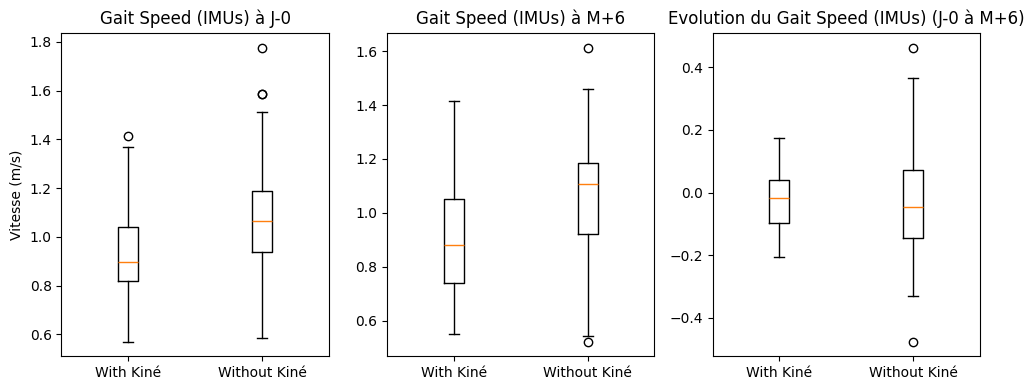

{'Between groups at J-0 (independent t-test)': {'p-value': '0.034',
  'With Kiné (Mean ± SD)': '0.95 ± 0.25',
  'Without Kiné (Mean ± SD)': '1.09 ± 0.22'},
 'Between groups at M+6 (independent t-test)': {'p-value': '0.055',
  'With Kiné (Mean ± SD)': '0.93 ± 0.26',
  'Without Kiné (Mean ± SD)': '1.06 ± 0.22'},
 'Between groups for Speed Change (independent t-test)': {'p-value': '0.779',
  'With Kiné (Mean ± SD)': '-0.02 ± 0.11',
  'Without Kiné (Mean ± SD)': '-0.03 ± 0.17'}}

In [12]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_examclin022 = data[['EXAMCLIN022', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin022 = data_examclin022.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate speed change (follow-up - baseline)
data_examclin022['Speed_Change'] = data_examclin022['AvgSpeed_follow-up'] - data_examclin022['AvgSpeed_baseline']

# Split data into Kine participants and non-participants
kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 1]
non_kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_kine_ttest_baseline = ttest_ind(kine_participants['AvgSpeed_baseline'], non_kine_participants['AvgSpeed_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_kine_ttest_followup = ttest_ind(kine_participants['AvgSpeed_follow-up'], non_kine_participants['AvgSpeed_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_kine = ttest_ind(kine_participants['Speed_Change'], non_kine_participants['Speed_Change'])

# Calculate Mean and Standard Deviation (SD)
mean_sd_results = {
    "J-0 With Kiné": f"{kine_participants['AvgSpeed_baseline'].mean():.2f} ± {kine_participants['AvgSpeed_baseline'].std():.2f}",
    "J-0 Without Kiné": f"{non_kine_participants['AvgSpeed_baseline'].mean():.2f} ± {non_kine_participants['AvgSpeed_baseline'].std():.2f}",
    "M+6 With Kiné": f"{kine_participants['AvgSpeed_follow-up'].mean():.2f} ± {kine_participants['AvgSpeed_follow-up'].std():.2f}",
    "M+6 Without Kiné": f"{non_kine_participants['AvgSpeed_follow-up'].mean():.2f} ± {non_kine_participants['AvgSpeed_follow-up'].std():.2f}",
    "Speed Change With Kiné": f"{kine_participants['Speed_Change'].mean():.2f} ± {kine_participants['Speed_Change'].std():.2f}",
    "Speed Change Without Kiné": f"{non_kine_participants['Speed_Change'].mean():.2f} ± {non_kine_participants['Speed_Change'].std():.2f}"
}

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [kine_participants['AvgSpeed_baseline'], non_kine_participants['AvgSpeed_baseline']],
    tick_labels=["With Kiné", "Without Kiné"]
)
plt.title("Gait Speed (IMUs) à J-0")
plt.ylabel("Vitesse (m/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['AvgSpeed_follow-up'], non_kine_participants['AvgSpeed_follow-up']],
    tick_labels=["With Kiné", "Without Kiné"]
)
plt.title("Gait Speed (IMUs) à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['Speed_Change'], non_kine_participants['Speed_Change']],
    tick_labels=["With Kiné", "Without Kiné"]
)
plt.title("Evolution du Gait Speed (IMUs) (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results with p-values and Mean ± SD
results_kine_with_sd = {
    "Between groups at J-0 (independent t-test)": {
        "p-value": f"{between_group_kine_ttest_baseline.pvalue:.3f}",
        "With Kiné (Mean ± SD)": mean_sd_results["J-0 With Kiné"],
        "Without Kiné (Mean ± SD)": mean_sd_results["J-0 Without Kiné"]
    },
    "Between groups at M+6 (independent t-test)": {
        "p-value": f"{between_group_kine_ttest_followup.pvalue:.3f}",
        "With Kiné (Mean ± SD)": mean_sd_results["M+6 With Kiné"],
        "Without Kiné (Mean ± SD)": mean_sd_results["M+6 Without Kiné"]
    },
    "Between groups for Speed Change (independent t-test)": {
        "p-value": f"{between_group_speed_change_kine.pvalue:.3f}",
        "With Kiné (Mean ± SD)": mean_sd_results["Speed Change With Kiné"],
        "Without Kiné (Mean ± SD)": mean_sd_results["Speed Change Without Kiné"]
    }
}

results_kine_with_sd


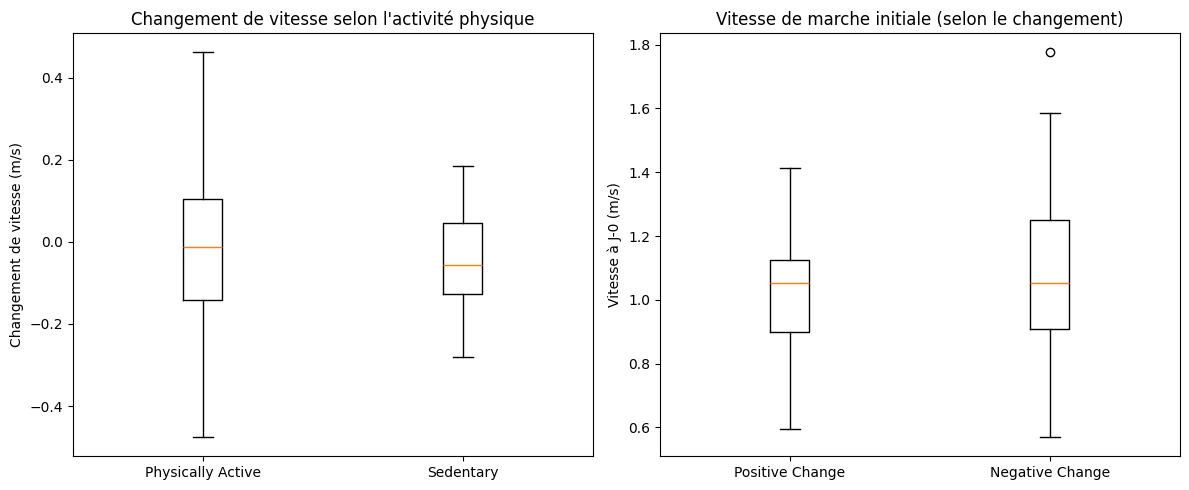

{'Physical Activity Influence on Speed Change': {'p-value': '0.398',
  'Physically Active (Mean ± SD)': '-0.01 ± 0.18',
  'Sedentary (Mean ± SD)': '-0.04 ± 0.12'},
 'Baseline Speed Influence on Speed Change': {'p-value': '0.192',
  'Positive Change (Mean ± SD)': '1.03 ± 0.17',
  'Negative Change (Mean ± SD)': '1.09 ± 0.26'}}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_examclin02 = data[['EXAMCLIN02', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin02 = data_examclin02.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate speed change (follow-up - baseline)
data_examclin02['Speed_Change'] = data_examclin02['AvgSpeed_follow-up'] - data_examclin02['AvgSpeed_baseline']

# Split data based on physical activity levels (EXAMCLIN02)
phys_active = data_examclin02[data_examclin02['EXAMCLIN02'] == 1]
phys_inactive = data_examclin02[data_examclin02['EXAMCLIN02'] == 0]

# Independent t-test for Speed Change between physically active and inactive participants
phys_activity_speed_change_ttest = ttest_ind(phys_active['Speed_Change'], phys_inactive['Speed_Change'])

# Investigate baseline speed influence on speed change
# Split data into participants with positive vs. negative speed changes
positive_change = data_examclin02[data_examclin02['Speed_Change'] > 0]
negative_change = data_examclin02[data_examclin02['Speed_Change'] <= 0]

# Independent t-test for baseline speed between participants with positive and negative speed changes
baseline_influence_ttest = ttest_ind(positive_change['AvgSpeed_baseline'], negative_change['AvgSpeed_baseline'])

# Data visualization: Boxplots for speed change based on physical activity and baseline influence
plt.figure(figsize=(12, 5))

# Speed Change by Physical Activity
plt.subplot(1, 2, 1)
plt.boxplot([phys_active['Speed_Change'], phys_inactive['Speed_Change']], tick_labels=["Physically Active", "Sedentary"])
plt.title("Changement de vitesse selon l'activité physique")
plt.ylabel("Changement de vitesse (m/s)")

# Baseline Speed for Positive vs. Negative Changes
plt.subplot(1, 2, 2)
plt.boxplot([positive_change['AvgSpeed_baseline'], negative_change['AvgSpeed_baseline']], tick_labels=["Positive Change", "Negative Change"])
plt.title("Vitesse de marche initiale (selon le changement)")
plt.ylabel("Vitesse à J-0 (m/s)")

plt.tight_layout()
plt.show()

# Summarizing results
results_influence = {
    "Physical Activity Influence on Speed Change": {
        "p-value": f"{phys_activity_speed_change_ttest.pvalue:.3f}",
        "Physically Active (Mean ± SD)": f"{phys_active['Speed_Change'].mean():.2f} ± {phys_active['Speed_Change'].std():.2f}",
        "Sedentary (Mean ± SD)": f"{phys_inactive['Speed_Change'].mean():.2f} ± {phys_inactive['Speed_Change'].std():.2f}"
    },
    "Baseline Speed Influence on Speed Change": {
        "p-value": f"{baseline_influence_ttest.pvalue:.3f}",
        "Positive Change (Mean ± SD)": f"{positive_change['AvgSpeed_baseline'].mean():.2f} ± {positive_change['AvgSpeed_baseline'].std():.2f}",
        "Negative Change (Mean ± SD)": f"{negative_change['AvgSpeed_baseline'].mean():.2f} ± {negative_change['AvgSpeed_baseline'].std():.2f}"
    }
}

results_influence


#### Walk Speed

##### EXAMCLIN02

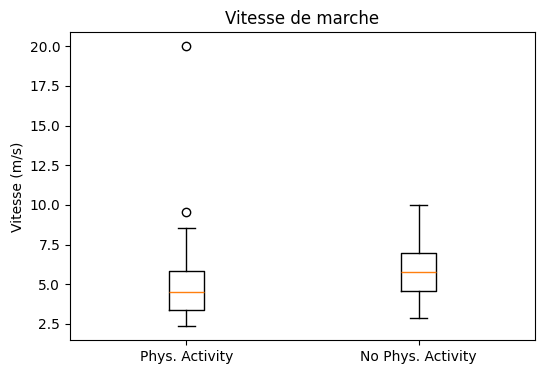

{'Between groups (independent t-test)': 0.013600172899692191}

In [8]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing baseline data are excluded
data_examclin02 = data[['EXAMCLIN02', 'SPPB06']].copy()
data_examclin02 = data_examclin02.dropna(subset=['SPPB06'])

# Split data into participants with and without physical activity
physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 1]
non_physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 0]

# Independent t-test at Baseline (J-0)
between_group_physac_ttest_baseline = ttest_ind(
    physac_participants['SPPB06'],
    non_physac_participants['SPPB06']
)

# Data visualization: boxplot for baseline speed
plt.figure(figsize=(6, 4))
plt.boxplot(
    [physac_participants['SPPB06'], non_physac_participants['SPPB06']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse de marche")
plt.ylabel("Vitesse (m/s)")
plt.show()

# Summarizing results
results_physac = {
    "Between groups (independent t-test)": between_group_physac_ttest_baseline.pvalue
}

results_physac


##### EXAMCLIN022

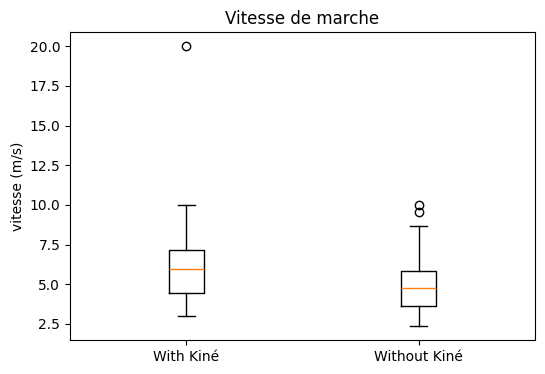

{'Between groups (independent t-test)': 0.0011537800976705813}

In [7]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing baseline data are excluded
data_examclin022 = data[['EXAMCLIN022', 'SPPB06']].copy()
data_examclin022 = data_examclin022.dropna(subset=['SPPB06'])

# Split data into Kine participants and non-participants
kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 1]
non_kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 0]

# Independent t-test at Baseline (J-0)
between_group_kine_ttest_baseline = ttest_ind(
    kine_participants['SPPB06'],
    non_kine_participants['SPPB06']
)

# Data visualization: boxplot for SPPB06 scores
plt.figure(figsize=(6, 4))
plt.boxplot(
    [kine_participants['SPPB06'], non_kine_participants['SPPB06']],
    tick_labels=["With Kiné", "Without Kiné"]
)
plt.title("Vitesse de marche")
plt.ylabel("vitesse (m/s)")
plt.show()

# Summarizing results
results_kine = {
    "Between groups (independent t-test)": between_group_kine_ttest_baseline.pvalue
}

results_kine


##### EXAMCLIN023

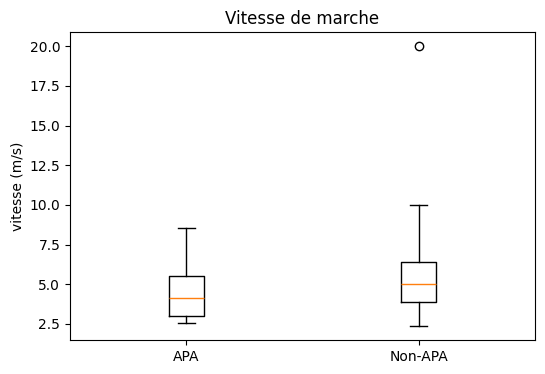

{'Between groups (independent t-test)': 0.18033547016782508}

In [6]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with complete baseline data are included
data_examclin023 = data[['EXAMCLIN023', 'SPPB06']].copy()
data_examclin023 = data_examclin023.dropna(subset=['SPPB06'])

# Split data into APA participants and non-participants
apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 1]
non_apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 0]

# Independent t-test at J-0 (Baseline)
between_group_ttest_baseline = ttest_ind(
    apa_participants['SPPB06'],
    non_apa_participants['SPPB06']
)

# Data visualization: Boxplot for SPPB06 scores at J-0
plt.figure(figsize=(6, 4))
plt.boxplot(
    [apa_participants['SPPB06'], non_apa_participants['SPPB06']],
    tick_labels=["APA", "Non-APA"]
)
plt.title("Vitesse de marche")
plt.ylabel("vitesse (m/s)")
plt.show()

# Summarizing results
results_between_groups = {
    "Between groups (independent t-test)": between_group_ttest_baseline.pvalue
}

results_between_groups


#### Average Speed du CoP (cm) YF

##### EXAMCLIN02

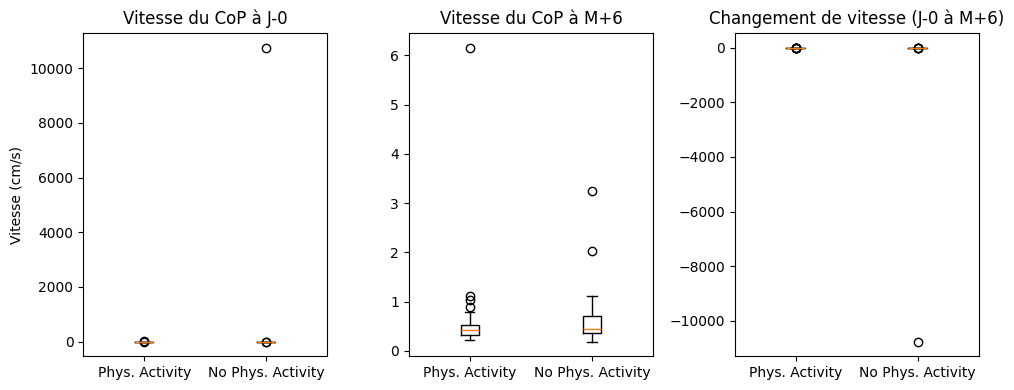

{'Between groups at J-0 avg Speed YF Physac (indep t-test)': 0.15133364172582636,
 'Between groups at M+6 avg Speed YF Physac (indep t-test)': 0.4461889939356719,
 'Between groups for Speed Change avg Speed YF Physac (indep t-test)': 0.15146073762476}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN02', 'mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YF_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YF_baseline']

# Split data into participants with and without physical activity
physac_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN02'] == 1]
non_physac_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN02'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_physac_ttest_baseline = ttest_ind(physac_participants['mean_velocity_ML_YF_baseline'], non_physac_participants['mean_velocity_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_physac_ttest_followup = ttest_ind(physac_participants['mean_velocity_ML_YF_follow-up'], non_physac_participants['mean_velocity_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_physac = ttest_ind(physac_participants['Speed_Change_CoP'], non_physac_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [physac_participants['mean_velocity_ML_YF_baseline'], non_physac_participants['mean_velocity_ML_YF_baseline']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [physac_participants['mean_velocity_ML_YF_follow-up'], non_physac_participants['mean_velocity_ML_YF_follow-up']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [physac_participants['Speed_Change_CoP'], non_physac_participants['Speed_Change_CoP']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 avg Speed YF Physac (indep t-test)": between_group_physac_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YF Physac (indep t-test)": between_group_physac_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YF Physac (indep t-test)": between_group_speed_change_physac.pvalue,
}

results_physac


##### EXAMCLIN022

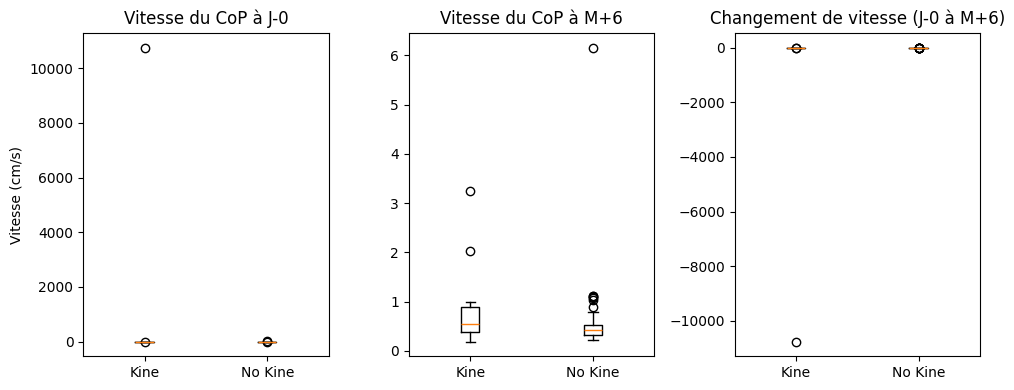

{'Between groups at J-0 avg Speed YF Kine (indep t-test)': 0.0176727240118794,
 'Between groups at M+6 avg Speed YF Kine (indep t-test)': 0.1715855261266802,
 'Between groups for Speed Change avg Speed YF Kine (indep t-test)': 0.017712513867629027}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN022', 'mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YF_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YF_baseline']

# Split data into participants with and without physical activity
kine_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN022'] == 1]
non_kine_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN022'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_kine_ttest_baseline = ttest_ind(kine_participants['mean_velocity_ML_YF_baseline'], non_kine_participants['mean_velocity_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_kine_ttest_followup = ttest_ind(kine_participants['mean_velocity_ML_YF_follow-up'], non_kine_participants['mean_velocity_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_kine = ttest_ind(kine_participants['Speed_Change_CoP'], non_kine_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [kine_participants['mean_velocity_ML_YF_baseline'], non_kine_participants['mean_velocity_ML_YF_baseline']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['mean_velocity_ML_YF_follow-up'], non_kine_participants['mean_velocity_ML_YF_follow-up']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['Speed_Change_CoP'], non_kine_participants['Speed_Change_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_kine = {
    "Between groups at J-0 avg Speed YF Kine (indep t-test)": between_group_kine_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YF Kine (indep t-test)": between_group_kine_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YF Kine (indep t-test)": between_group_speed_change_kine.pvalue,
}

results_kine


##### EXAMCLIN023

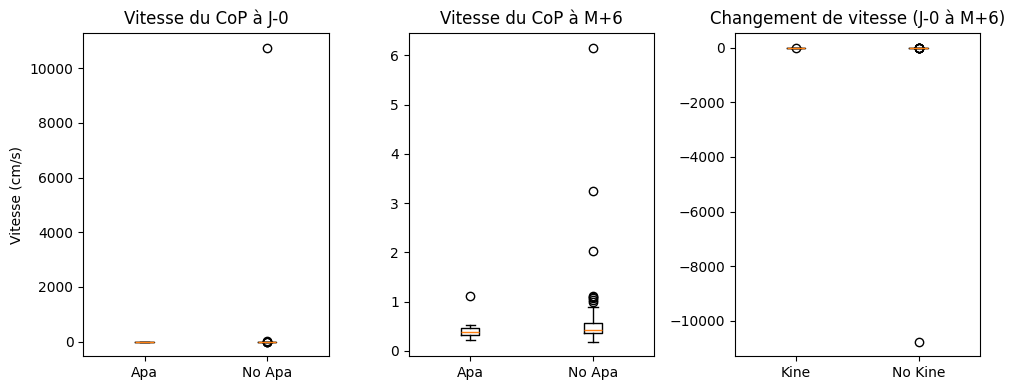

{'Between groups at J-0 avg Speed YF apa (indep t-test)': 0.7344724336469619,
 'Between groups at M+6 avg Speed YF apa (indep t-test)': 0.5241844438129655,
 'Between groups for Speed Change avg Speed YF apa (indep t-test)': 0.7347665936473106}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN023', 'mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YF_baseline', 'mean_velocity_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YF_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YF_baseline']

# Split data into participants with and without physical activity
apa_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN023'] == 1]
non_apa_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN023'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_apa_ttest_baseline = ttest_ind(apa_participants['mean_velocity_ML_YF_baseline'], non_apa_participants['mean_velocity_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_apa_ttest_followup = ttest_ind(apa_participants['mean_velocity_ML_YF_follow-up'], non_apa_participants['mean_velocity_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_apa = ttest_ind(apa_participants['Speed_Change_CoP'], non_apa_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [apa_participants['mean_velocity_ML_YF_baseline'], non_apa_participants['mean_velocity_ML_YF_baseline']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [apa_participants['mean_velocity_ML_YF_follow-up'], non_apa_participants['mean_velocity_ML_YF_follow-up']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [apa_participants['Speed_Change_CoP'], non_apa_participants['Speed_Change_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_apa = {
    "Between groups at J-0 avg Speed YF apa (indep t-test)": between_group_apa_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YF apa (indep t-test)": between_group_apa_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YF apa (indep t-test)": between_group_speed_change_apa.pvalue,
}

results_apa


#### Average Speed du CoP YO

##### EXAMCLIN02

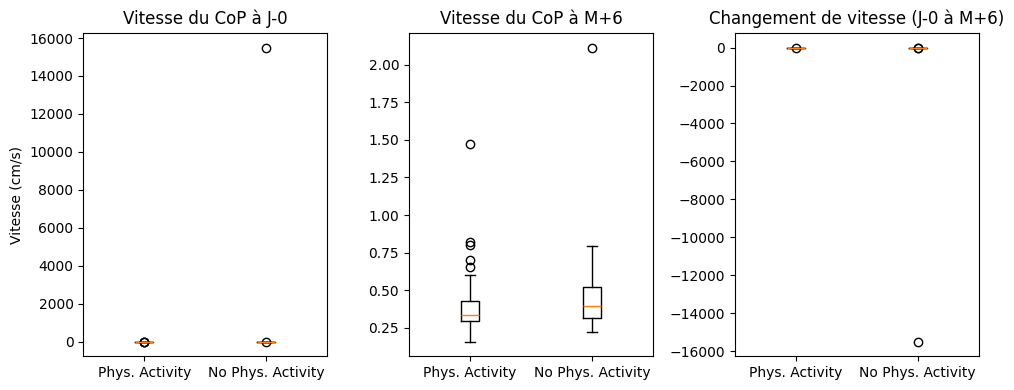

{'Between groups at J-0 avg Speed YO (indep t-test)': 0.15136501786553663,
 'Between groups at M+6 avg Speed YO (indep t-test)': 0.16321307234183638,
 'Between groups for Speed Change avg Speed YO (indep t-test)': 0.1514236921098317}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN02', 'mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YO_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YO_baseline']

# Split data into participants with and without physical activity
physac_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN02'] == 1]
non_physac_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN02'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_physac_ttest_baseline = ttest_ind(physac_participants['mean_velocity_ML_YO_baseline'], non_physac_participants['mean_velocity_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_physac_ttest_followup = ttest_ind(physac_participants['mean_velocity_ML_YO_follow-up'], non_physac_participants['mean_velocity_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_physac = ttest_ind(physac_participants['Speed_Change_CoP'], non_physac_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [physac_participants['mean_velocity_ML_YO_baseline'], non_physac_participants['mean_velocity_ML_YO_baseline']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [physac_participants['mean_velocity_ML_YO_follow-up'], non_physac_participants['mean_velocity_ML_YO_follow-up']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [physac_participants['Speed_Change_CoP'], non_physac_participants['Speed_Change_CoP']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 avg Speed YO (indep t-test)": between_group_physac_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YO (indep t-test)": between_group_physac_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YO (indep t-test)": between_group_speed_change_physac.pvalue,
}

results_physac


##### EXAMCLIN022

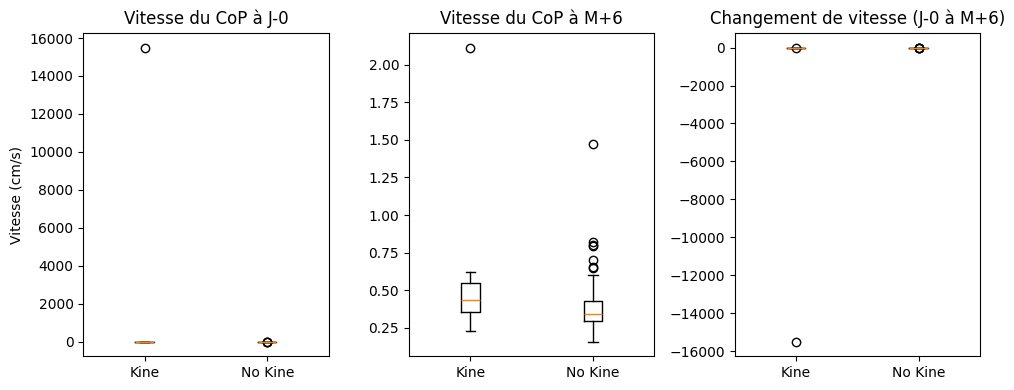

{'Between groups at J-0 avg Speed YO Kine (indep t-test)': 0.017675938069483005,
 'Between groups at M+6 avg Speed YO Kine (indep t-test)': 0.054583879606195825,
 'Between groups for Speed Change avg Speed YO Kine (indep t-test)': 0.017689703854957994}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN022', 'mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YO_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YO_baseline']

# Split data into participants with and without physical activity
kine_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN022'] == 1]
non_kine_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN022'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_kine_ttest_baseline = ttest_ind(kine_participants['mean_velocity_ML_YO_baseline'], non_kine_participants['mean_velocity_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_kine_ttest_followup = ttest_ind(kine_participants['mean_velocity_ML_YO_follow-up'], non_kine_participants['mean_velocity_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_kine = ttest_ind(kine_participants['Speed_Change_CoP'], non_kine_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [kine_participants['mean_velocity_ML_YO_baseline'], non_kine_participants['mean_velocity_ML_YO_baseline']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['mean_velocity_ML_YO_follow-up'], non_kine_participants['mean_velocity_ML_YO_follow-up']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['Speed_Change_CoP'], non_kine_participants['Speed_Change_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_kine = {
    "Between groups at J-0 avg Speed YO Kine (indep t-test)": between_group_kine_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YO Kine (indep t-test)": between_group_kine_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YO Kine (indep t-test)": between_group_speed_change_kine.pvalue,
}

results_kine


##### EXAMCLIN023

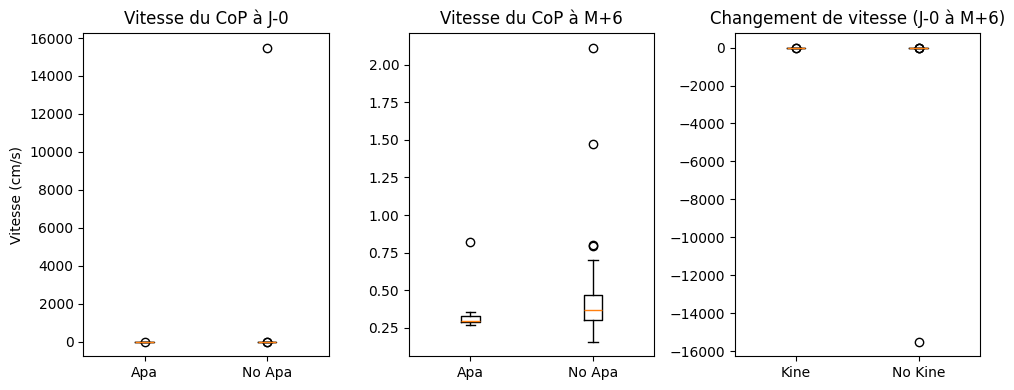

{'Between groups at J-0 avg Speed YO apa (indep t-test)': 0.7346834291197752,
 'Between groups at M+6 avg Speed YO apa (indep t-test)': 0.4234650438896925,
 'Between groups for Speed Change avg Speed YO apa (indep t-test)': 0.7347740840343189}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_avgspeed_cop = data[['EXAMCLIN023', 'mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up']].copy()
data_avgspeed_cop = data_avgspeed_cop.dropna(subset=['mean_velocity_ML_YO_baseline', 'mean_velocity_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_avgspeed_cop['Speed_Change_CoP'] = data_avgspeed_cop['mean_velocity_ML_YO_follow-up'] - data_avgspeed_cop['mean_velocity_ML_YO_baseline']

# Split data into participants with and without physical activity
apa_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN023'] == 1]
non_apa_participants = data_avgspeed_cop[data_avgspeed_cop['EXAMCLIN023'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_apa_ttest_baseline = ttest_ind(apa_participants['mean_velocity_ML_YO_baseline'], non_apa_participants['mean_velocity_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_apa_ttest_followup = ttest_ind(apa_participants['mean_velocity_ML_YO_follow-up'], non_apa_participants['mean_velocity_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_speed_change_apa = ttest_ind(apa_participants['Speed_Change_CoP'], non_apa_participants['Speed_Change_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [apa_participants['mean_velocity_ML_YO_baseline'], non_apa_participants['mean_velocity_ML_YO_baseline']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("Vitesse du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [apa_participants['mean_velocity_ML_YO_follow-up'], non_apa_participants['mean_velocity_ML_YO_follow-up']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("Vitesse du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [apa_participants['Speed_Change_CoP'], non_apa_participants['Speed_Change_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("Changement de vitesse (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_apa = {
    "Between groups at J-0 avg Speed YO apa (indep t-test)": between_group_apa_ttest_baseline.pvalue,
    "Between groups at M+6 avg Speed YO apa (indep t-test)": between_group_apa_ttest_followup.pvalue,
    "Between groups for Speed Change avg Speed YO apa (indep t-test)": between_group_speed_change_apa.pvalue,
}

results_apa


#### ML VARIATION YO

##### EXAMCLIN02

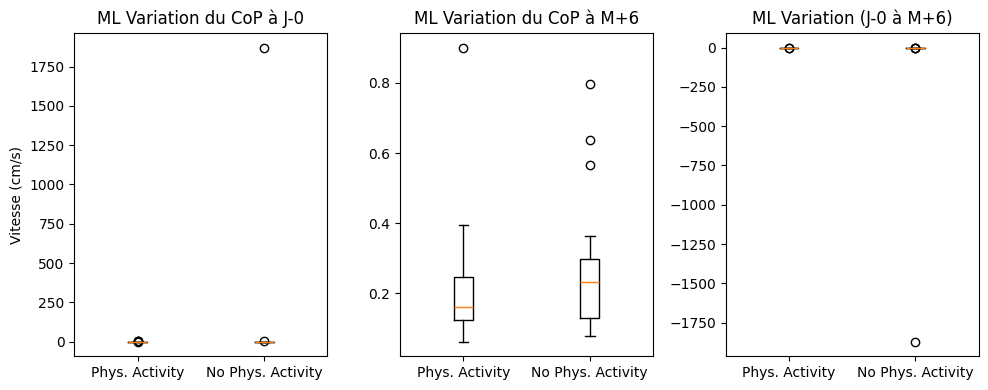

{'Between groups at J-0 ML Variation YO (indep t-test)': 0.15112745154236315,
 'Between groups at M+6 ML Variation YO (indep t-test)': 0.1785475545563454,
 'Between groups for Speed Change ML Variation YO (indep t-test)': 0.15150584751949978}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN02', 'rms_ML_YO_baseline', 'rms_ML_YO_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YO_baseline', 'rms_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ML_Variation_CoP'] = data_ML_Variation_cop['rms_ML_YO_follow-up'] - data_ML_Variation_cop['rms_ML_YO_baseline']

# Split data into participants with and without physical activity
physac_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN02'] == 1]
non_physac_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN02'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_physac_ttest_baseline = ttest_ind(physac_participants['rms_ML_YO_baseline'], non_physac_participants['rms_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_physac_ttest_followup = ttest_ind(physac_participants['rms_ML_YO_baseline'], non_physac_participants['rms_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_physac = ttest_ind(physac_participants['ML_Variation_CoP'], non_physac_participants['ML_Variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [physac_participants['rms_ML_YO_baseline'], non_physac_participants['rms_ML_YO_baseline']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [physac_participants['rms_ML_YO_follow-up'], non_physac_participants['rms_ML_YO_follow-up']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [physac_participants['ML_Variation_CoP'], non_physac_participants['ML_Variation_CoP']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 ML Variation YO (indep t-test)": between_group_physac_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YO (indep t-test)": between_group_physac_ttest_followup.pvalue,
    "Between groups for Speed Change ML Variation YO (indep t-test)": between_group_ml_variation_physac.pvalue,
}

results_physac


##### EXAMCLIN022

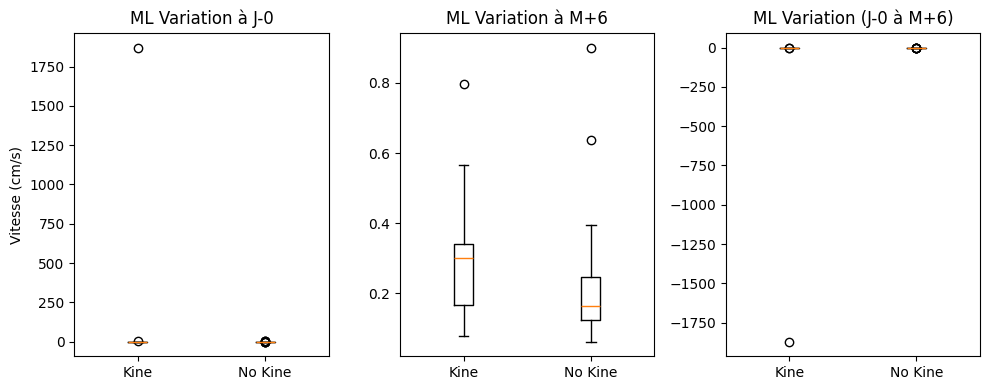

{'Between groups at J-0 ML Variation YO Kine (indep t-test)': 0.01765107625773907,
 'Between groups at M+6 ML Variation YO Kine (indep t-test)': 0.009678925744481589,
 'Between groups for Speed Change ML VariationYO Kine (indep t-test)': 0.017735051881673868}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN022', 'rms_ML_YO_baseline', 'rms_ML_YO_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YO_baseline', 'rms_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ml_variation_CoP'] = data_ML_Variation_cop['rms_ML_YO_follow-up'] - data_ML_Variation_cop['rms_ML_YO_baseline']

# Split data into participants with and without physical activity
kine_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN022'] == 1]
non_kine_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN022'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_kine_ttest_baseline = ttest_ind(kine_participants['rms_ML_YO_baseline'], non_kine_participants['rms_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_kine_ttest_followup = ttest_ind(kine_participants['rms_ML_YO_follow-up'], non_kine_participants['rms_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_kine = ttest_ind(kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [kine_participants['rms_ML_YO_baseline'], non_kine_participants['rms_ML_YO_baseline']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['rms_ML_YO_follow-up'], non_kine_participants['rms_ML_YO_follow-up']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_kine = {
    "Between groups at J-0 ML Variation YO Kine (indep t-test)": between_group_kine_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YO Kine (indep t-test)": between_group_kine_ttest_followup.pvalue,
    "Between groups for Speed Change ML VariationYO Kine (indep t-test)": between_group_ml_variation_kine.pvalue,
}

results_kine


##### EXAMCLIN023

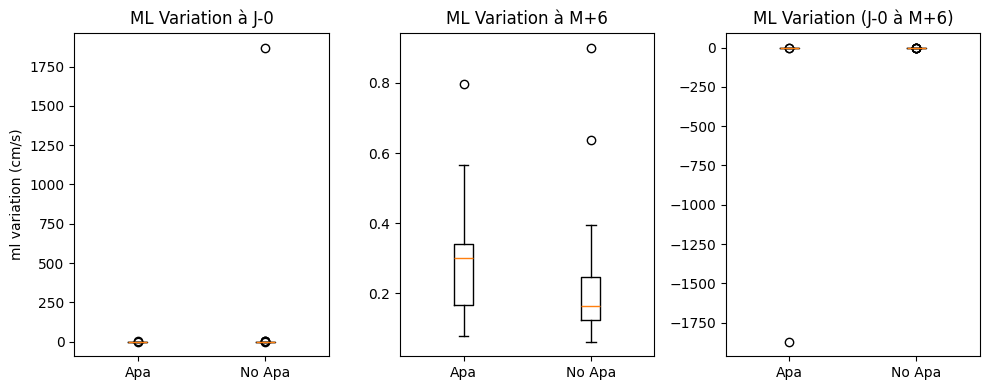

{'Between groups at J-0 ML Variation YO Apa (indep t-test)': 0.7347069895161092,
 'Between groups at M+6 ML Variation YO Apa (indep t-test)': 0.14838829987066995,
 'Between groups for Speed Change ML VariationYO Apa (indep t-test)': 0.7354597212736408}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN023', 'rms_ML_YO_baseline', 'rms_ML_YO_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YO_baseline', 'rms_ML_YO_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ml_variation_CoP'] = data_ML_Variation_cop['rms_ML_YO_follow-up'] - data_ML_Variation_cop['rms_ML_YO_baseline']

# Split data into participants with and without physical activity
apa_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN023'] == 1]
non_apa_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN023'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_apa_ttest_baseline = ttest_ind(apa_participants['rms_ML_YO_baseline'], non_apa_participants['rms_ML_YO_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_apa_ttest_followup = ttest_ind(apa_participants['rms_ML_YO_follow-up'], non_apa_participants['rms_ML_YO_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_apa = ttest_ind(apa_participants['ml_variation_CoP'], non_apa_participants['ml_variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [apa_participants['rms_ML_YO_baseline'], non_apa_participants['rms_ML_YO_baseline']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation à J-0")
plt.ylabel("ml variation (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['rms_ML_YO_follow-up'], non_kine_participants['rms_ML_YO_follow-up']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_apa = {
    "Between groups at J-0 ML Variation YO Apa (indep t-test)": between_group_apa_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YO Apa (indep t-test)": between_group_apa_ttest_followup.pvalue,
    "Between groups for Speed Change ML VariationYO Apa (indep t-test)": between_group_ml_variation_apa.pvalue,
}

results_apa


#### ML VARIATION YF

##### EXAMCLIN02

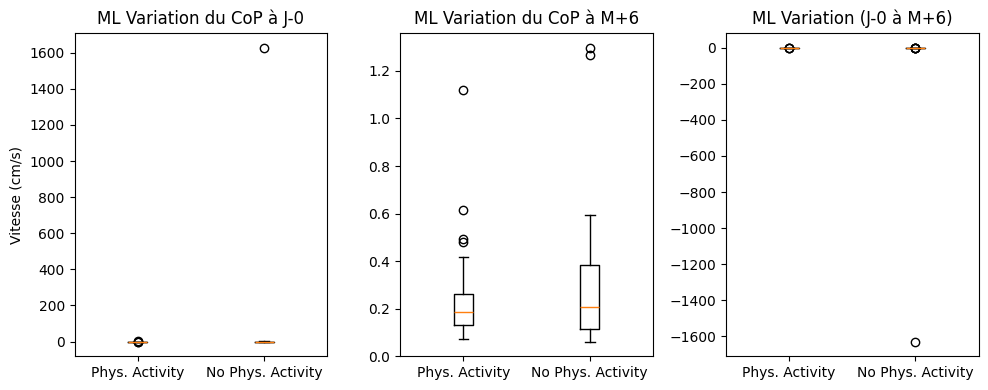

{'Between groups at J-0 ML Variation YF (indep t-test)': 0.15087232567783934,
 'Between groups at M+6 ML Variation YF (indep t-test)': 0.004875477776476142,
 'Between groups for Speed Change ML Variation YF (indep t-test)': 0.15138321184355644}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN02', 'rms_ML_YF_baseline', 'rms_ML_YF_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YF_baseline', 'rms_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ML_Variation_CoP'] = data_ML_Variation_cop['rms_ML_YF_follow-up'] - data_ML_Variation_cop['rms_ML_YF_baseline']

# Split data into participants with and without physical activity
physac_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN02'] == 1]
non_physac_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN02'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_physac_ttest_baseline = ttest_ind(physac_participants['rms_ML_YF_baseline'], non_physac_participants['rms_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_physac_ttest_followup = ttest_ind(physac_participants['rms_ML_YF_baseline'], non_physac_participants['rms_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_physac = ttest_ind(physac_participants['ML_Variation_CoP'], non_physac_participants['ML_Variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [physac_participants['rms_ML_YF_baseline'], non_physac_participants['rms_ML_YF_baseline']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation du CoP à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [physac_participants['rms_ML_YF_follow-up'], non_physac_participants['rms_ML_YF_follow-up']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation du CoP à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [physac_participants['ML_Variation_CoP'], non_physac_participants['ML_Variation_CoP']],
    tick_labels=["Phys. Activity", "No Phys. Activity"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 ML Variation YF (indep t-test)": between_group_physac_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YF (indep t-test)": between_group_physac_ttest_followup.pvalue,
    "Between groups for Speed Change ML Variation YF (indep t-test)": between_group_ml_variation_physac.pvalue,
}

results_physac


##### EXAMCLIN022

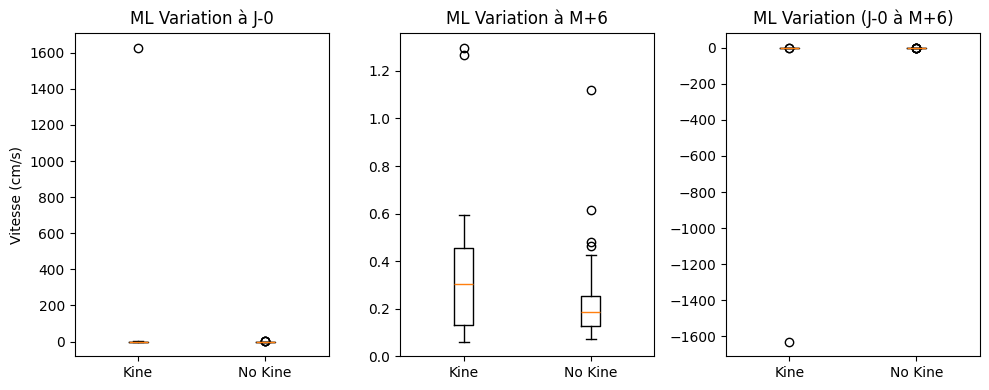

{'Between groups at J-0 ML Variation YF Kine (indep t-test)': 0.017628442867732547,
 'Between groups at M+6 ML Variation YF Kine (indep t-test)': 0.002092736947552382,
 'Between groups for Speed Change ML Variation YF Kine (indep t-test)': 0.017808887789367338}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN022', 'rms_ML_YF_baseline', 'rms_ML_YF_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YF_baseline', 'rms_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ml_variation_CoP'] = data_ML_Variation_cop['rms_ML_YF_follow-up'] - data_ML_Variation_cop['rms_ML_YF_baseline']

# Split data into participants with and without physical activity
kine_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN022'] == 1]
non_kine_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN022'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_kine_ttest_baseline = ttest_ind(kine_participants['rms_ML_YF_baseline'], non_kine_participants['rms_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_kine_ttest_followup = ttest_ind(kine_participants['rms_ML_YF_follow-up'], non_kine_participants['rms_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_kine = ttest_ind(kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [kine_participants['rms_ML_YF_baseline'], non_kine_participants['rms_ML_YF_baseline']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation à J-0")
plt.ylabel("Vitesse (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['rms_ML_YF_follow-up'], non_kine_participants['rms_ML_YF_follow-up']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP']],
    tick_labels=["Kine", "No Kine"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_kine = {
    "Between groups at J-0 ML Variation YF Kine (indep t-test)": between_group_kine_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YF Kine (indep t-test)": between_group_kine_ttest_followup.pvalue,
    "Between groups for Speed Change ML Variation YF Kine (indep t-test)": between_group_ml_variation_kine.pvalue,
}

results_kine


##### EXAMCLIN023

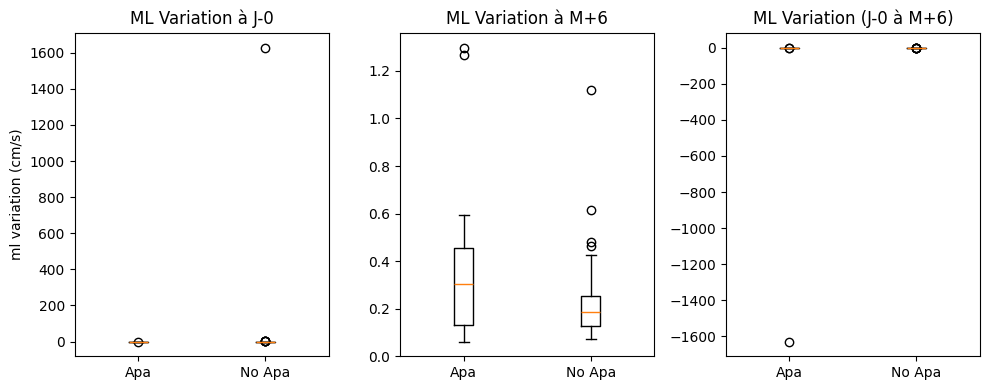

{'Between groups at J-0 ML Variation YF Apa (indep t-test)': 0.7340185028423827,
 'Between groups at M+6 ML Variation YF Apa (indep t-test)': 0.38769718063344294,
 'Between groups for Speed Change ML Variation YF Apa (indep t-test)': 0.7348162402374232}

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_ML_Variation_cop = data[['EXAMCLIN023', 'rms_ML_YF_baseline', 'rms_ML_YF_follow-up']].copy()
data_ML_Variation_cop = data_ML_Variation_cop.dropna(subset=['rms_ML_YF_baseline', 'rms_ML_YF_follow-up'])

# Calculate speed change (follow-up - baseline)
data_ML_Variation_cop['ml_variation_CoP'] = data_ML_Variation_cop['rms_ML_YF_follow-up'] - data_ML_Variation_cop['rms_ML_YF_baseline']

# Split data into participants with and without physical activity
apa_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN023'] == 1]
non_apa_participants = data_ML_Variation_cop[data_ML_Variation_cop['EXAMCLIN023'] == 0]

# 1. Independent t-test at J-0 (Baseline)
between_group_apa_ttest_baseline = ttest_ind(apa_participants['rms_ML_YF_baseline'], non_apa_participants['rms_ML_YF_baseline'])

# 2. Independent t-test at M+6 (Follow-up)
between_group_apa_ttest_followup = ttest_ind(apa_participants['rms_ML_YF_follow-up'], non_apa_participants['rms_ML_YF_follow-up'])

# 3. Independent t-test for Speed Change (J-0 to M+6)
between_group_ml_variation_apa = ttest_ind(apa_participants['ml_variation_CoP'], non_apa_participants['ml_variation_CoP'])

# Data visualization: boxplot for baseline, follow-up, and speed change
plt.figure(figsize=(10, 4))

# Baseline comparison
plt.subplot(1, 3, 1)
plt.boxplot(
    [apa_participants['rms_ML_YF_baseline'], non_apa_participants['rms_ML_YF_baseline']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation à J-0")
plt.ylabel("ml variation (cm/s)")

# Follow-up comparison
plt.subplot(1, 3, 2)
plt.boxplot(
    [kine_participants['rms_ML_YF_follow-up'], non_kine_participants['rms_ML_YF_follow-up']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation à M+6")

# Speed Change comparison
plt.subplot(1, 3, 3)
plt.boxplot(
    [kine_participants['ml_variation_CoP'], non_kine_participants['ml_variation_CoP']],
    tick_labels=["Apa", "No Apa"]
)
plt.title("ML Variation (J-0 à M+6)")

plt.tight_layout()
plt.show()

# Summarizing results
results_apa = {
    "Between groups at J-0 ML Variation YF Apa (indep t-test)": between_group_apa_ttest_baseline.pvalue,
    "Between groups at M+6 ML Variation YF Apa (indep t-test)": between_group_apa_ttest_followup.pvalue,
    "Between groups for Speed Change ML Variation YF Apa (indep t-test)": between_group_ml_variation_apa.pvalue,
}

results_apa


### Chronic diseases

#### Total

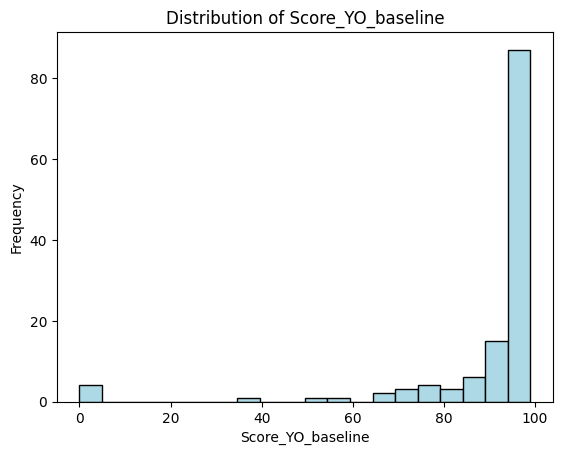

In [ ]:
# plot the distribution of 'Score_YO_baseline'

data['Score_YO_baseline'].plot(kind='hist', bins=20, edgecolor='black', color='lightblue')
plt.xlabel('Score_YO_baseline')
plt.ylabel('Frequency')
plt.title('Distribution of Score_YO_baseline')
plt.show()




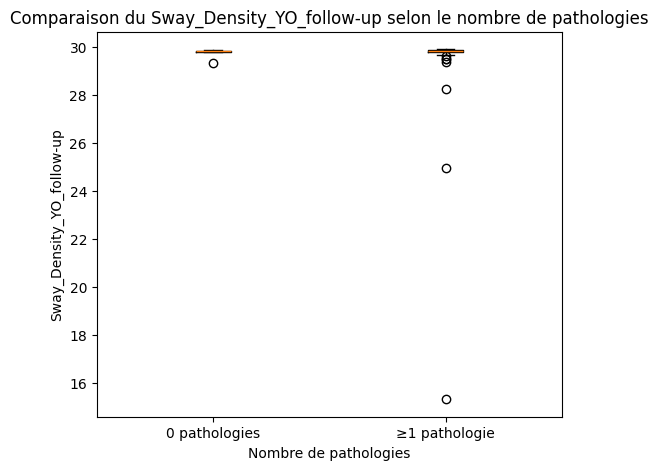

{'p-value': '0.744', 'Groupe 0 pathologies (Mean ± SD)': '29.80 ± 0.15', 'Groupe ≥1 pathologie (Mean ± SD)': '29.55 ± 1.73'}


In [ ]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Vérification si les variables sont présentes dans les données
if 'FROPCOM0007 - COTATION QUESTION' in data.columns and 'Sway_Density_YO_follow-up' in data.columns:

    # Séparer les groupes : 0 pathologies vs. au moins 1 pathologie
    no_pathology = data[data['FROPCOM0007 - COTATION QUESTION'] == 0]['Sway_Density_YO_follow-up'].dropna()
    has_pathology = data[data['FROPCOM0007 - COTATION QUESTION'] > 0]['Sway_Density_YO_follow-up'].dropna()

    # Vérification que chaque groupe a assez de données
    if len(no_pathology) > 1 and len(has_pathology) > 1:
        # Test de Mann-Whitney
        mannwhitney_result = mannwhitneyu(no_pathology, has_pathology, alternative='two-sided')

        # Visualisation : Boxplot
        plt.figure(figsize=(6, 5))
        plt.boxplot([no_pathology, has_pathology], tick_labels=["0 pathologies", "≥1 pathologie"])
        plt.title("Comparaison du Sway_Density_YO_follow-up selon le nombre de pathologies")
        plt.ylabel("Sway_Density_YO_follow-up")
        plt.xlabel("Nombre de pathologies")
        plt.show()

        # Affichage des résultats
        result_mannwhitney = {
            "p-value": f"{mannwhitney_result.pvalue:.3f}",
            "Groupe 0 pathologies (Mean ± SD)": f"{no_pathology.mean():.2f} ± {no_pathology.std():.2f}",
            "Groupe ≥1 pathologie (Mean ± SD)": f"{has_pathology.mean():.2f} ± {has_pathology.std():.2f}",
        }
        print(result_mannwhitney)
    else:
        print("Données insuffisantes pour exécuter le test.")
else:
    print("Variables nécessaires absentes du dataset.")


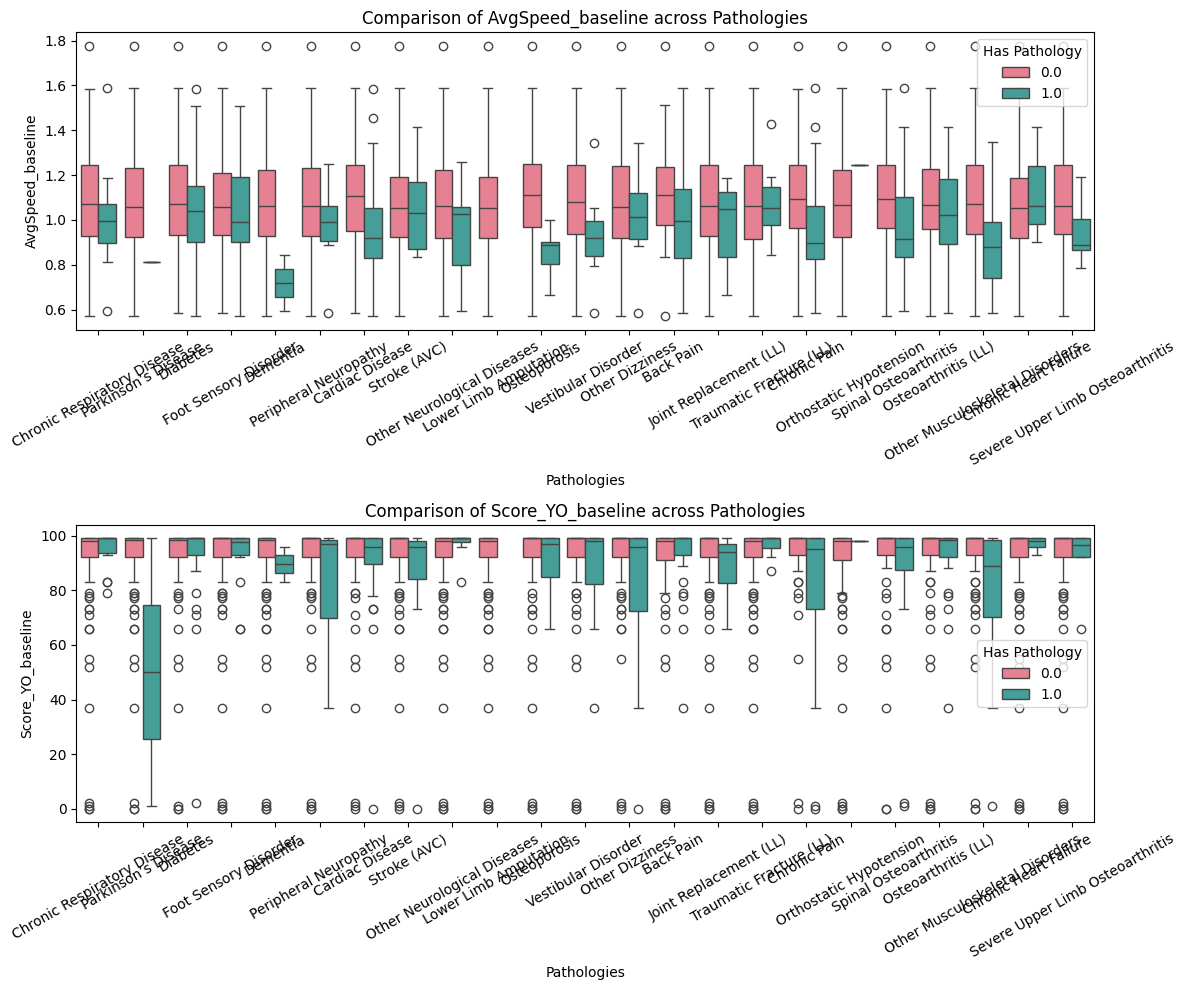

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all pathology columns (including 23 and 24)
pathologies_cols = [
    'FROPCOM0007_SQ002_',  # Chronic Respiratory Disease
    'FROPCOM0007_SQ003_',  # Parkinson’s Disease
    'FROPCOM0007_SQ004_',  # Diabetes
    'FROPCOM0007_SQ005_',  # Foot Sensory Disorder
    'FROPCOM0007_SQ006_',  # Dementia
    'FROPCOM0007_SQ007_',  # Peripheral Neuropathy
    'FROPCOM0007_SQ008_',  # Cardiac Disease
    'FROPCOM0007_SQ009_',  # Stroke (AVC)
    'FROPCOM0007_SQ010_',  # Other Neurological Diseases
    'FROPCOM0007_SQ011_',  # Lower Limb Amputation
    'FROPCOM0007_SQ012_',  # Osteoporosis
    'FROPCOM0007_SQ013_',  # Vestibular Disorder
    'FROPCOM0007_SQ014_',  # Other Dizziness
    'FROPCOM0007_SQ015_',  # Back Pain
    'FROPCOM0007_SQ016_',  # Joint Replacement (LL)
    'FROPCOM0007_SQ017_',  # Traumatic Fracture (LL)
    'FROPCOM0007_SQ018_',  # Chronic Pain
    'FROPCOM0007_SQ019_',  # Orthostatic Hypotension
    'FROPCOM0007_SQ020_',  # Spinal Osteoarthritis
    'FROPCOM0007_SQ021_',  # Osteoarthritis (LL)
    'FROPCOM0007_SQ022_',  # Other Musculoskeletal Disorders
    'FROPCOM0007_SQ023_',  # Chronic Heart Failure
    'FROPCOM0007_SQ024_',  # Severe Upper Limb Osteoarthritis
]

# Dictionary for readable pathology labels
pathology_labels = {
    'FROPCOM0007_SQ002_': 'Chronic Respiratory Disease',
    'FROPCOM0007_SQ003_': 'Parkinson’s Disease',
    'FROPCOM0007_SQ004_': 'Diabetes',
    'FROPCOM0007_SQ005_': 'Foot Sensory Disorder',
    'FROPCOM0007_SQ006_': 'Dementia',
    'FROPCOM0007_SQ007_': 'Peripheral Neuropathy',
    'FROPCOM0007_SQ008_': 'Cardiac Disease',
    'FROPCOM0007_SQ009_': 'Stroke (AVC)',
    'FROPCOM0007_SQ010_': 'Other Neurological Diseases',
    'FROPCOM0007_SQ011_': 'Lower Limb Amputation',
    'FROPCOM0007_SQ012_': 'Osteoporosis',
    'FROPCOM0007_SQ013_': 'Vestibular Disorder',
    'FROPCOM0007_SQ014_': 'Other Dizziness',
    'FROPCOM0007_SQ015_': 'Back Pain',
    'FROPCOM0007_SQ016_': 'Joint Replacement (LL)',
    'FROPCOM0007_SQ017_': 'Traumatic Fracture (LL)',
    'FROPCOM0007_SQ018_': 'Chronic Pain',
    'FROPCOM0007_SQ019_': 'Orthostatic Hypotension',
    'FROPCOM0007_SQ020_': 'Spinal Osteoarthritis',
    'FROPCOM0007_SQ021_': 'Osteoarthritis (LL)',
    'FROPCOM0007_SQ022_': 'Other Musculoskeletal Disorders',
    'FROPCOM0007_SQ023_': 'Chronic Heart Failure',
    'FROPCOM0007_SQ024_': 'Severe Upper Limb Osteoarthritis',
}

# Features to compare (Walking Speed & Balance)
features = ["AvgSpeed_baseline", "Score_YO_baseline"]

# Create boxplots
fig, axes = plt.subplots(len(features), 1, figsize=(12, 5 * len(features)))

for i, feature in enumerate(features):
    melted_data = data.melt(id_vars=feature, value_vars=pathologies_cols, var_name="Pathology", value_name="Has Pathology")

    # Map pathology labels
    melted_data["Pathology"] = melted_data["Pathology"].map(pathology_labels)

    # Boxplot
    sns.boxplot(x="Pathology", y=feature, hue="Has Pathology", data=melted_data, palette="husl", ax=axes[i])
    axes[i].set_title(f"Comparison of {feature} across Pathologies")
    axes[i].set_xlabel("Pathologies")
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


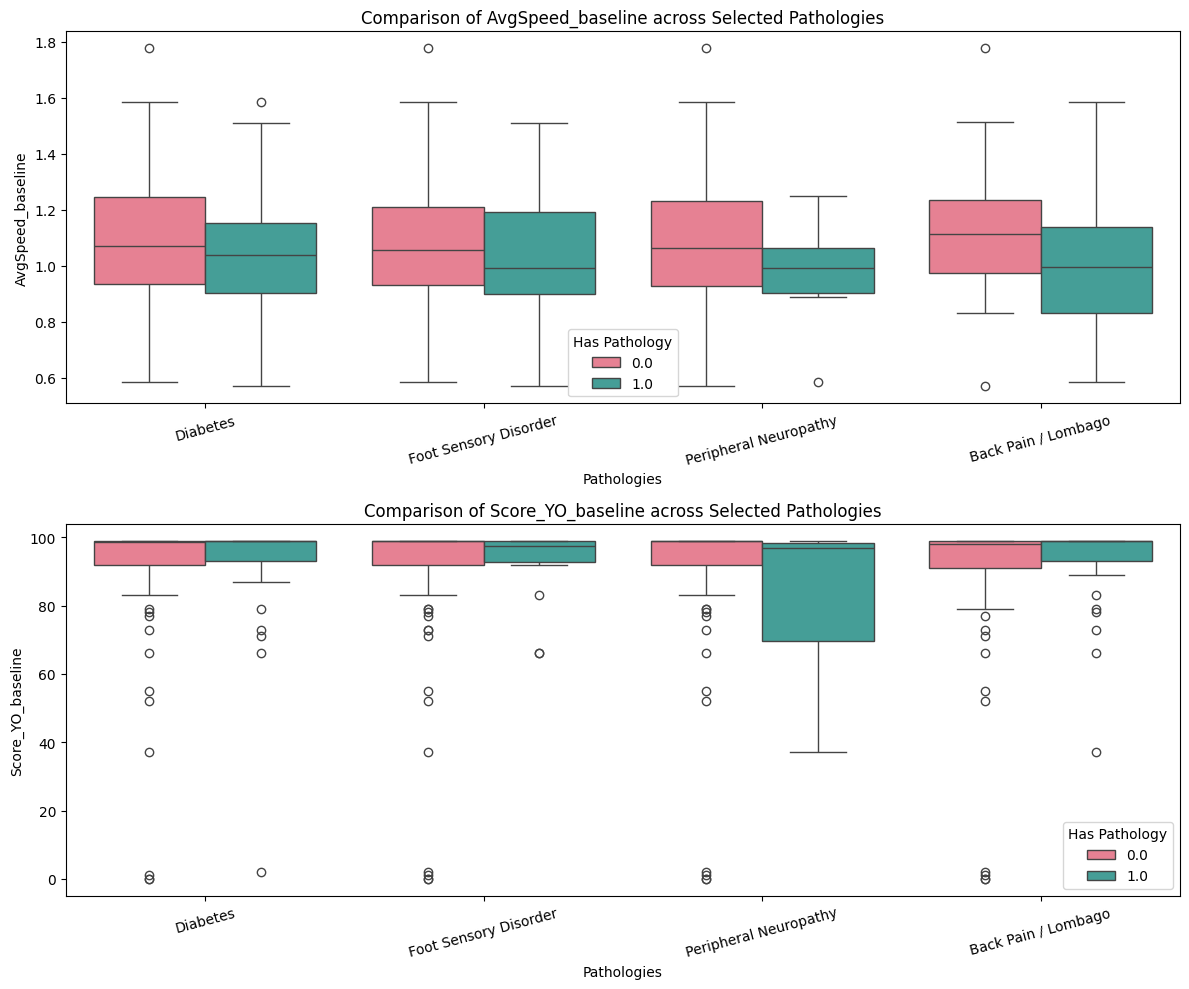

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the 4 key pathologies
pathologies_cols = [
    'FROPCOM0007_SQ004_',  # Diabetes
    'FROPCOM0007_SQ005_',  # Foot Sensory Disorder
    'FROPCOM0007_SQ007_',  # Peripheral Neuropathy
    'FROPCOM0007_SQ015_',  # Back Pain / Lombago
]

# Dictionary for better labeling
pathology_labels = {
    'FROPCOM0007_SQ004_': 'Diabetes',
    'FROPCOM0007_SQ005_': 'Foot Sensory Disorder',
    'FROPCOM0007_SQ007_': 'Peripheral Neuropathy',
    'FROPCOM0007_SQ015_': 'Back Pain / Lombago',
}

# Features to compare
features = ["AvgSpeed_baseline", "Score_YO_baseline"]

# Create boxplots
fig, axes = plt.subplots(len(features), 1, figsize=(12, 5 * len(features)))

for i, feature in enumerate(features):
    melted_data = data.melt(id_vars=feature, value_vars=pathologies_cols, var_name="Pathology", value_name="Has Pathology")

    # Map pathology labels
    melted_data["Pathology"] = melted_data["Pathology"].map(pathology_labels)

    # Boxplot
    sns.boxplot(x="Pathology", y=feature, hue="Has Pathology", data=melted_data, palette="husl", ax=axes[i])
    axes[i].set_title(f"Comparison of {feature} across Selected Pathologies")
    axes[i].set_xlabel("Pathologies")
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# List of selected pathologies
pathologies_cols = [
    'FROPCOM0007_SQ004_',  # Diabetes
    'FROPCOM0007_SQ005_',  # Foot Sensory Disorder
    'FROPCOM0007_SQ007_',  # Peripheral Neuropathy
    'FROPCOM0007_SQ015_',  # Back Pain / Lombago
]

# Dictionary for readable labels
pathology_labels = {
    'FROPCOM0007_SQ004_': 'Diabetes',
    'FROPCOM0007_SQ005_': 'Foot Sensory Disorder',
    'FROPCOM0007_SQ007_': 'Peripheral Neuropathy',
    'FROPCOM0007_SQ015_': 'Back Pain / Lombago',
}

# Features to compare
features = ["AvgSpeed_baseline", "Score_Densit_Baseline"]

# Dictionary to store results
results = {}

for pathology in pathologies_cols:
    results[pathology_labels[pathology]] = {}

    for feature in features:
        # Split groups based on presence (1) or absence (0) of pathology
        group_with = data[data[pathology] == 1][feature].dropna()
        group_without = data[data[pathology] == 0][feature].dropna()

        # Perform independent t-test (Welch’s test for unequal variances)
        t_stat, p_value = ttest_ind(group_with, group_without, equal_var=False)

        # Store results
        results[pathology_labels[pathology]][feature] = {
            "t-statistic": round(t_stat, 3),
            "p-value": round(p_value, 3),
            "Mean ± SD (With)": f"{round(group_with.mean(), 3)} ± {round(group_with.std(), 3)}",
            "Mean ± SD (Without)": f"{round(group_without.mean(), 3)} ± {round(group_without.std(), 3)}"
        }

# Print results
import pprint
pprint.pprint(results)


KeyError: 'Score_Densit_Baseline'

### Feature Importance

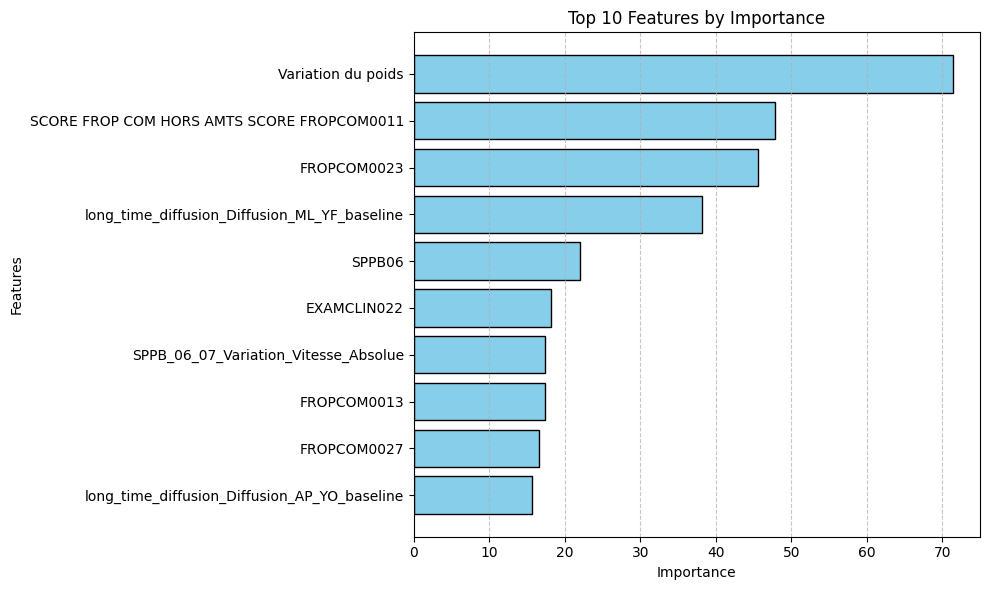

In [ ]:
def plot_top_features(data, top_n=10):
    """
    Plot the top N features and their importance.

    Parameters:
    - data: pandas DataFrame with columns ['Features', 'Importance']
    - top_n: number of top features to plot
    """
    # Sort the data by 'Importance' and select the top N features
    top_features = data.sort_values(by="Importance", ascending=False).head(top_n)

    # Create the horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue', edgecolor='black')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title(f"Top {top_n} Features by Importance")
    plt.gca().invert_yaxis()  # Invert y-axis to have the best feature at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

data_path = '/content/lightgbm_fragire18_feature_importances.xlsx'
data = pd.read_excel(data_path)


# Plot the top 10 features
plot_top_features(data, top_n=10)


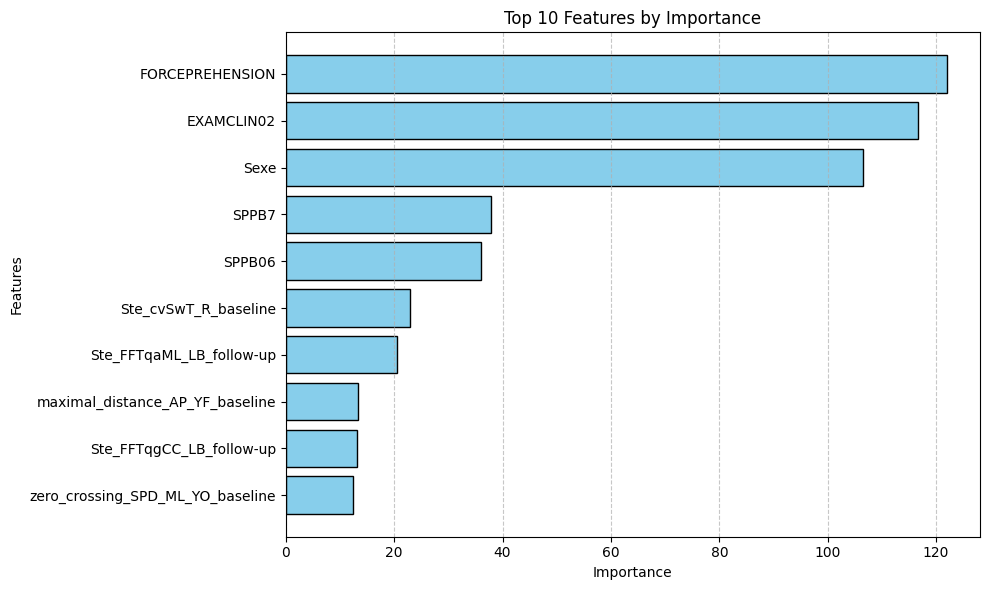

In [ ]:
data_path_f = '/content/lightgbm_fried_feature_importances.xlsx'
data_f = pd.read_excel(data_path_f)


# Plot the top 10 features
plot_top_features(data_f, top_n=10)